In [5]:
pip install category-encoders==1.0.4

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc

In [9]:
df= pd.read_csv("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_2_25FEB24/EntregableMachineLearning/sample_mmp.csv")

/var/folders/hn/58jsz1wd6jn8ypqlsj_ym3sc0000gn/T/ipykernel_74500/884727793.py:1: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Entregables/Entregable_2_25FEB24/EntregableMachineLearning/sample_mmp.csv")


In [10]:
df.head(5)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0,0,NaN,...,19951.0,0,NaN,0.0,0,0,0.0,0.0,11.0,1
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0,0,NaN,...,48753.0,0,0.0,0.0,0,0,0.0,1.0,3.0,0
2,2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0,0,NaN,...,33111.0,1,0.0,0.0,1,1,0.0,0.0,15.0,0
3,1359513,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.0,0,NaN,...,48473.0,1,NaN,0.0,0,0,0.0,0.0,15.0,1
4,236059,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.0,0,NaN,...,4343.0,1,NaN,0.0,1,0,0.0,1.0,13.0,1


In [11]:
df.shape

(500000, 84)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,500000.0,4.458888e+06,2.575619e+06,2.0,2227692.50,4461367.5,6.690936e+06,8.921471e+06
IsBeta,500000.0,2.000000e-06,1.414214e-03,0.0,0.00,0.0,0.000000e+00,1.000000e+00
RtpStateBitfield,498168.0,6.846207e+00,1.023049e+00,0.0,7.00,7.0,7.000000e+00,3.500000e+01
IsSxsPassiveMode,500000.0,1.724200e-02,1.301720e-01,0.0,0.00,0.0,0.000000e+00,1.000000e+00
DefaultBrowsersIdentifier,24061.0,1.652825e+03,1.004754e+03,1.0,788.00,1632.0,2.381000e+03,3.209000e+03
AVProductStatesIdentifier,498062.0,4.785091e+04,1.402309e+04,3.0,49480.00,53447.0,5.344700e+04,7.049200e+04
AVProductsInstalled,498062.0,1.326763e+00,5.229999e-01,1.0,1.00,1.0,2.000000e+00,5.000000e+00
AVProductsEnabled,498062.0,1.020714e+00,1.666080e-01,0.0,1.00,1.0,1.000000e+00,4.000000e+00
HasTpm,500000.0,9.878160e-01,1.097068e-01,0.0,1.00,1.0,1.000000e+00,1.000000e+00
CountryIdentifier,500000.0,1.080375e+02,6.306854e+01,1.0,51.00,97.0,1.620000e+02,2.220000e+02


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

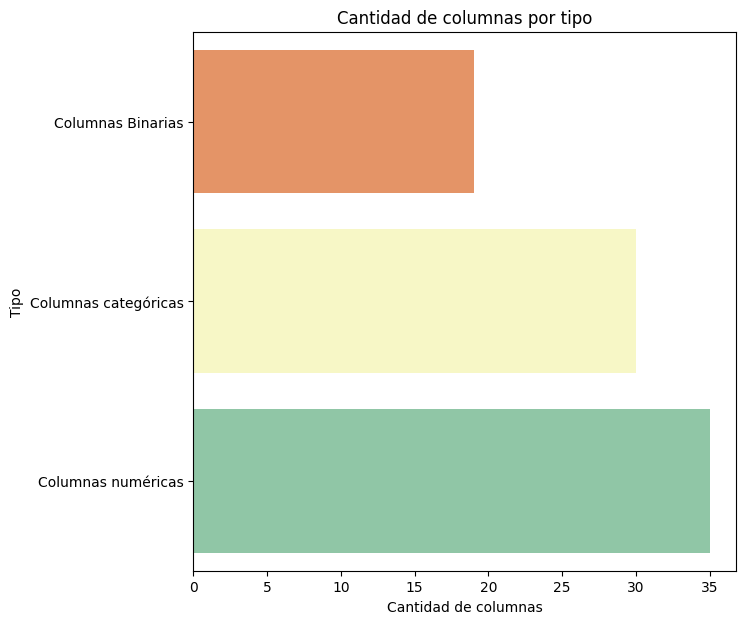

In [14]:
# Obtener información sobre registros no nulos
missing_df = pd.DataFrame({'Columna': df.columns, 'Número de registros': df.count(), 'Total': len(df)}).sort_values("Número de registros", ascending=False)

# Obtener información sobre la cardinalidad
cardinality_df = pd.DataFrame({'Columna': df.columns, 'Cardinality': df.nunique()}).sort_values("Cardinality", ascending=False)
cardinality_df = cardinality_df[cardinality_df['Cardinality'] > 2]  # Filtrar columnas con más de 2 valores únicos

# Obtener información sobre el tipo de columnas
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
true_numerical_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col not in binary_columns]
categorical_columns = [col for col in df.columns if col not in true_numerical_columns and col not in binary_columns]

type_df = pd.DataFrame({'Type': ['Columnas Binarias', 'Columnas numéricas', 'Columnas categóricas'],
                        'Conteo de Columnas': [len(binary_columns), len(true_numerical_columns), len(categorical_columns)]}).sort_values('Conteo de Columnas', ascending=True)


f, ax = plt.subplots(figsize=(7, 7))


sns.barplot(x="Conteo de Columnas", y="Type", data=type_df, palette='Spectral', hue = 'Type', legend=False)

plt.title('Cantidad de columnas por tipo')
plt.xlabel('Cantidad de columnas')
plt.ylabel('Tipo')

plt.show()



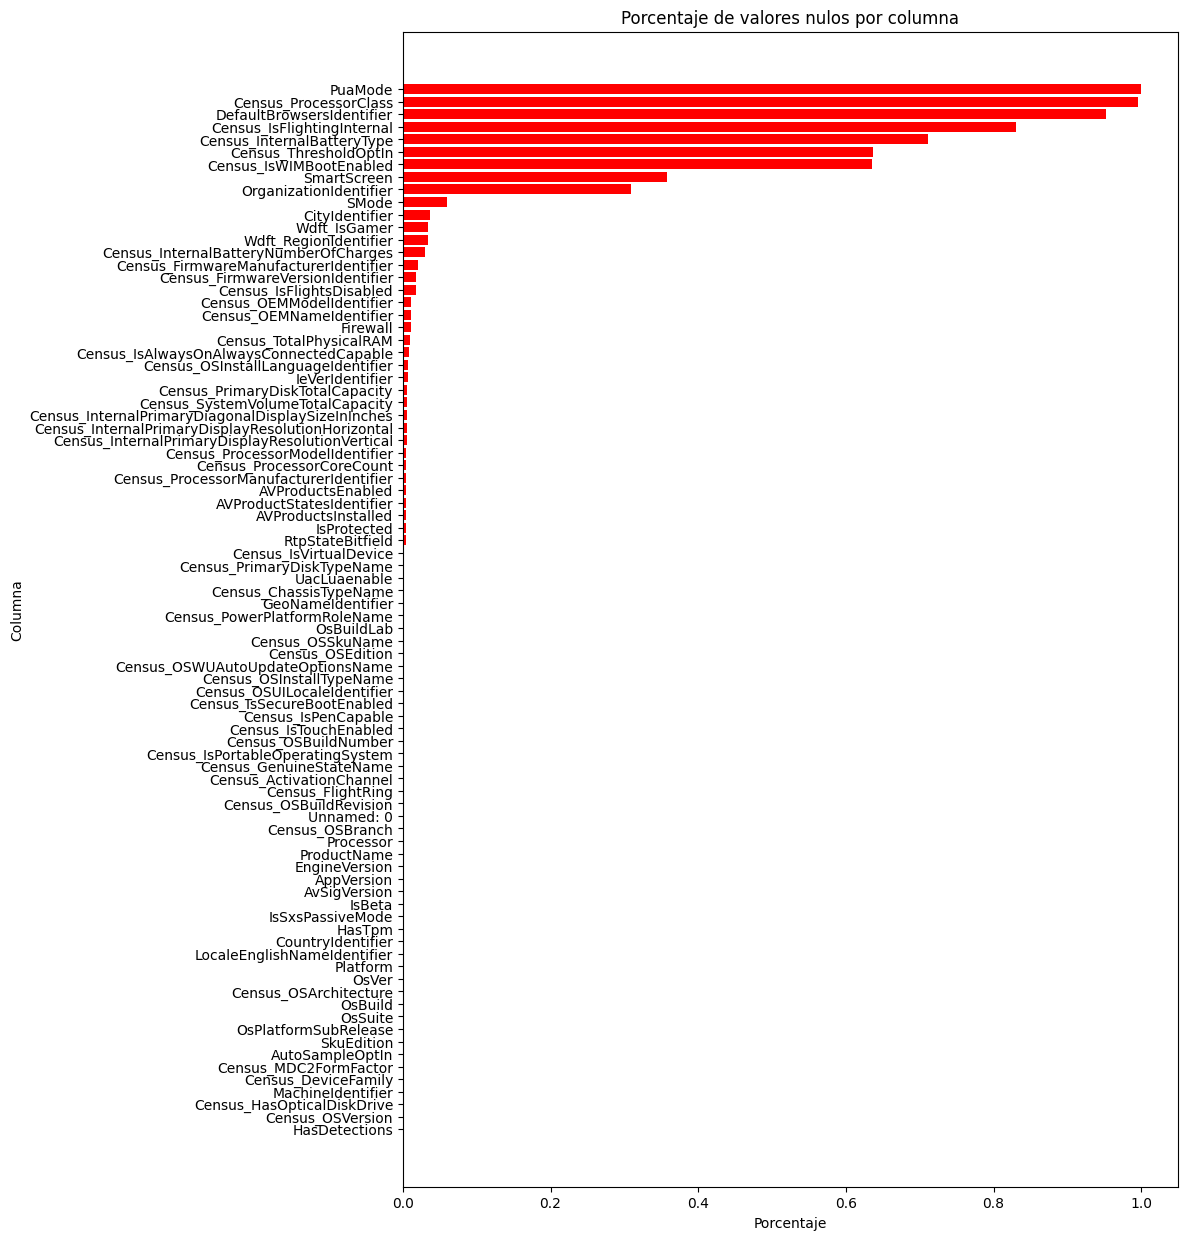

In [15]:
# Obtener el porcentaje de valores nulos por columna
df_null_values = df.isnull().mean().sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(10,15))

# Crear el gráfico de barras horizontal
ax.barh(y=df_null_values.index,  # Posicionar las barras según los índices
        width=df_null_values,  
        color='red')  

# Invertir el eje Y para que las columnas aparezcan en orden correcto
ax.invert_yaxis()

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje')
plt.ylabel('Columna')


plt.show()


/var/folders/hn/58jsz1wd6jn8ypqlsj_ym3sc0000gn/T/ipykernel_74500/1086767184.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cardinalidad', y='column', data=df_cardinalidad,palette="coolwarm")


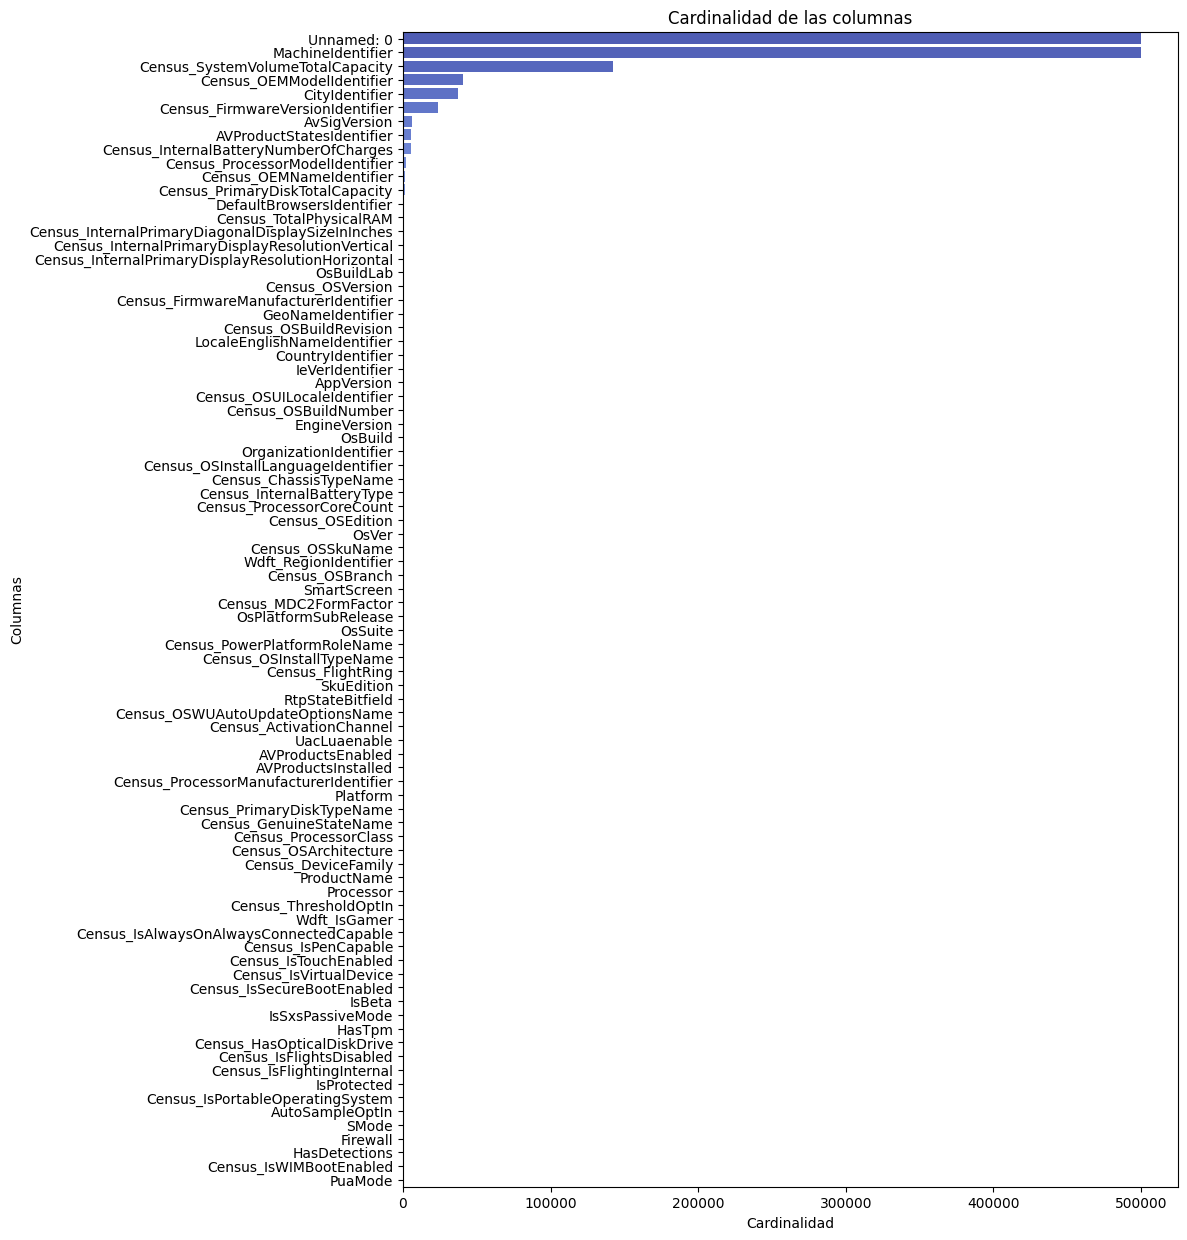

In [16]:
# Calcular la cardinalidad de cada columna
cardinalidad = df.nunique()
df_cardinalidad = pd.DataFrame({'column': cardinalidad.index, 'cardinalidad': cardinalidad.values})
df_cardinalidad = df_cardinalidad.sort_values(by='cardinalidad', ascending=False)

fig, ax = plt.subplots(figsize=(10,15))
sns.barplot(x='cardinalidad', y='column', data=df_cardinalidad,palette="coolwarm")

plt.title('Cardinalidad de las columnas')
plt.xlabel('Cardinalidad')
plt.ylabel('Columnas')

plt.show()

In [17]:
df2 = df.copy()

In [18]:
# Distribución de nulos 
#plt.figure(figsize=(12, 6))
#sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
#plt.title('Distribución de nulos por columna')
#plt.show()

In [19]:
#Memoria RAM por procesador
df2['RAM_x_procesador'] = df2['Census_TotalPhysicalRAM']/ df2['Census_ProcessorCoreCount']
df2['RAM_x_procesador'] = df2['RAM_x_procesador'].fillna(-1)

In [20]:
# Capacidad total del disco primario
df2['capacidad_total_disco_primario'] = df2['Census_PrimaryDiskTotalCapacity']

# Capacidad de la unidad C:
df2['unidad_c_capacidad'] = df2['Census_SystemVolumeTotalCapacity']

# Proporción de uso de la unidad C:
df2['proporcion_uso_unidad_c'] = df2['unidad_c_capacidad'] / df2['capacidad_total_disco_primario']

#relleno a -1 los nulos
df2['proporcion_uso_unidad_c'].fillna(-1, inplace=True)

/var/folders/hn/58jsz1wd6jn8ypqlsj_ym3sc0000gn/T/ipykernel_74500/1322604907.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['proporcion_uso_unidad_c'].fillna(-1, inplace=True)


In [21]:
# Capacidad total del disco primario en bytes
df2['capacidad_total_disco_primario'] = df2['Census_PrimaryDiskTotalCapacity']

# Capacidad de la unidad C: en bytes
df2['capacidad_unidad_c'] = df2['Census_SystemVolumeTotalCapacity']

# Espacio no utilizado en el disco primario en bytes
df2['espacio_no_utilizado_disco_primario'] = df2['capacidad_total_disco_primario'] - df2['capacidad_unidad_c']


In [22]:
df2.head()

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,RAM_x_procesador,capacidad_total_disco_primario,unidad_c_capacidad,proporcion_uso_unidad_c,capacidad_unidad_c,espacio_no_utilizado_disco_primario
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0,0,NaN,...,0.0,0.0,11.0,1,2048.0,953869.0,952838.0,0.998919,952838.0,1031.0
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0,0,NaN,...,0.0,1.0,3.0,0,2048.0,476940.0,457600.0,0.959450,457600.0,19340.0
2,2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0,0,NaN,...,0.0,0.0,15.0,0,2048.0,244198.0,221251.0,0.906031,221251.0,22947.0
3,1359513,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.0,0,NaN,...,0.0,0.0,15.0,1,1024.0,228936.0,228321.0,0.997314,228321.0,615.0
4,236059,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.0,0,NaN,...,0.0,1.0,13.0,1,1024.0,476940.0,464374.0,0.973653,464374.0,12566.0


In [23]:


## Obtiene las columnas del DataFrame original
#columnas_originales = set(df.columns)

# Obtiene las columnas del DataFrame después de eliminar las columnas con más del 90% de valores nulos
#columnas_finales = set(df2.columns)
#df2 = df.dropna(axis=1,thresh=df.shape[0]*0.9) # elimina columnas con un mínimo del 90% de info. se quedan en 75column

# Obtiene la diferencia entre las dos conjuntos de columnas
#columnas_eliminadas = columnas_originales - columnas_finales

#print('Las siguientes columnas fueron eliminadas:', *columnas_eliminadas, sep='\n')


In [24]:
# Obtiene las columnas con más del 90% de valores nulos
columnas_con_nulos = np.where(np.mean(df2.isnull(), axis=0) > 0.9)[0]

# Si no hay columnas con más del 90% de valores nulos
if not columnas_con_nulos.size:
    print('No hay columnas con más del 90% de valores nulos')
else:
    print('Las siguientes columnas tienen más del 90% de valores nulos:')
    print(*df2.columns[columnas_con_nulos], sep='\n')


Las siguientes columnas tienen más del 90% de valores nulos:
DefaultBrowsersIdentifier
PuaMode
Census_ProcessorClass


In [25]:
# Código de imputación de valores nulos
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

numeric_imputer = SimpleImputer(strategy='median')
df[numeric_features] = numeric_imputer.fit_transform(df[numeric_features])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 90 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [27]:
df2 = df2.drop(["Unnamed: 0"], axis = 1)
#elimino Unnamed: 0

In [28]:
df2.set_index("MachineIdentifier", inplace = True)
#defino "MachineIdentifier" como index

In [29]:
df2.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 88 entries, ProductName to espacio_no_utilizado_disco_primario
dtypes: float64(42), int64(17), object(29)
memory usage: 339.5+ MB


In [30]:
TARGET = 'HasDetections'
df2[TARGET].mean()

0.499906

In [31]:
df2[TARGET].value_counts(normalize= True)*100

HasDetections
0    50.0094
1    49.9906
Name: proportion, dtype: float64

In [32]:

tipos = df2.dtypes
#  diccionario para contar las columnas por tipo
columnas_por_tipo = {}
for col, tipo in tipos.items():
    if tipo not in columnas_por_tipo:
        columnas_por_tipo[tipo] = 0
    columnas_por_tipo[tipo] += 1


for tipo, num_columnas in columnas_por_tipo.items():
    print(f"{tipo}: {num_columnas}")


object: 29
int64: 17
float64: 42


In [33]:
columns_to_kill = [
'AutoSampleOptIn',
"OsBuildLab",
'Census_InternalBatteryNumberOfCharges',
"IeVerIdentifier",
"Census_OEMNameIdentifier",
'Census_InternalBatteryType',
'Census_IsFlightingInternal',
'Census_IsFlightsDisabled',
'Census_IsWIMBootEnabled',
"CountryIdentifier",
"CityIdentifier",
"GeoNameIdentifier" ,
'Census_ProcessorClass',
'Census_ThresholdOptIn',
"Census_OSBuildRevision",
'DefaultBrowsersIdentifier',
"Census_FirmwareVersionIdentifier",
'IsBeta',
"Census_InternalPrimaryDisplayResolutionHorizontal",
"Census_InternalPrimaryDisplayResolutionVertical",
"Census_InternalPrimaryDiagonalDisplaySizeInInches" ,
'PuaMode',
'UacLuaenable',
'Unnamed: 0',
"Census_OSSkuName"]



In [34]:
lista_eliminar = ["AutoSampleOptIn", "OsBuildLab", "CityIdentifier","GeoNameIdentifier" ,"Census_InternalBatteryNumberOfCharges", "IsBeta", "Census_InternalPrimaryDisplayResolutionHorizontal", "Census_InternalPrimaryDisplayResolutionVertical","UacLuaenable", "Census_InternalPrimaryDiagonalDisplaySizeInInches" ,'Census_IsWIMBootEnabled','PuaMode']
#columnas a eliminar por no aportar información relevante al DF o que ya la tengo en otras columnas o que tiene un porcentaje de nulos muy alto

In [35]:
columns_to_drop = [col for col in columns_to_kill if col in df2.columns]
df3 = df2.drop(columns = columns_to_drop)

In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 64 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ProductName                              500000 non-null  object 
 1   EngineVersion                            500000 non-null  object 
 2   AppVersion                               500000 non-null  object 
 3   AvSigVersion                             500000 non-null  object 
 4   RtpStateBitfield                         498168 non-null  float64
 5   IsSxsPassiveMode                         500000 non-null  int64  
 6   AVProductStatesIdentifier                498062 non-null  float64
 7   AVProductsInstalled                      498062 non-null  float64
 8   AVProductsEnabled                        498062 non-null  float64
 9   HasTpm                                   500000 non

def imprimir_correlaciones(df, umbral=0.789):
    # Calcular la matriz de correlación
    matriz_correlacion = df.corr()

    # Obtener las columnas con correlación superior al umbral
    columnas_correlacionadas = []
    for i in range(len(matriz_correlacion.columns)):
        for j in range(i):
            if abs(matriz_correlacion.iloc[i, j]) > umbral:
                col1 = matriz_correlacion.columns[i]
                col2 = matriz_correlacion.columns[j]
                correlacion = matriz_correlacion.iloc[i, j] * 100  # Multiplicar por 100 para obtener el porcentaje
                columnas_correlacionadas.append((col1, col2, correlacion))

    # Imprimir las columnas con correlación superior al umbral
    for col1, col2, correlacion in columnas_correlacionadas:
        print(f"{col1} y {col2} tienen una correlación del {correlacion:.2f}%")

# Llamar a la función con tu DataFrame
imprimir_correlaciones(df3, umbral=0.789)


In [37]:
# Detectar filas duplicadas

df3[df3.duplicated(keep = False)]

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,...,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,RAM_x_procesador,capacidad_total_disco_primario,unidad_c_capacidad,proporcion_uso_unidad_c,capacidad_unidad_c,espacio_no_utilizado_disco_primario
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
57d85f393aefe874da48ba804bbcab53,win8defender,1.1.15200.1,4.18.1807.18075,1.275.11.0,7.0,0,53447.0,1.0,1.0,1,...,0.0,0.0,3.0,0,2048.0,488386.0,487109.0,0.997385,487109.0,1277.0
076419ebbf5c2a2f01d28305e0cc26b5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1494.0,7.0,0,53447.0,1.0,1.0,1,...,0.0,0.0,10.0,1,1024.0,953869.0,952592.0,0.998661,952592.0,1277.0
b8f2beb43419cefdaead05b5a23e060f,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1198.0,7.0,0,53447.0,1.0,1.0,1,...,0.0,1.0,3.0,1,2048.0,244198.0,224776.0,0.920466,224776.0,19422.0
f96fabf6d7fc4c825b592adfa786b65f,win8defender,1.1.13504.0,4.11.15063.0,1.237.0.0,7.0,0,53447.0,1.0,1.0,1,...,0.0,1.0,10.0,0,512.0,476940.0,200000.0,0.419340,200000.0,276940.0
ee56f22630d041d90629a2bc391d268c,win8defender,1.1.15200.1,4.18.1807.18075,1.275.850.0,7.0,0,53447.0,1.0,1.0,1,...,0.0,0.0,15.0,0,1024.0,238475.0,237924.0,0.997689,237924.0,551.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5eab06d5944c449c5a17cf812dc58fce,win8defender,1.1.15100.1,4.8.10240.17443,1.273.836.0,7.0,0,53447.0,1.0,1.0,1,...,0.0,0.0,12.0,1,1024.0,29820.0,29038.0,0.973776,29038.0,782.0
a911fc2729dbe6b52fdf4f1366a44999,win8defender,1.1.15100.1,4.18.1806.18062,1.273.371.0,7.0,0,53447.0,1.0,1.0,1,...,0.0,1.0,11.0,0,1024.0,953869.0,935728.0,0.980982,935728.0,18141.0
fe5b72e09b527dcf8effaf9fa4cd9350,win8defender,1.1.13504.0,4.11.15063.447,1.237.0.0,7.0,0,53447.0,1.0,1.0,1,...,0.0,0.0,10.0,0,2048.0,476940.0,475799.0,0.997608,475799.0,1141.0


In [38]:
# eliminar filas duplicadas
df3.drop_duplicates(inplace=True)
 #verificar 0 filas duplicadas
df3[df3.duplicated(keep=False)]

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,...,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,RAM_x_procesador,capacidad_total_disco_primario,unidad_c_capacidad,proporcion_uso_unidad_c,capacidad_unidad_c,espacio_no_utilizado_disco_primario
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,


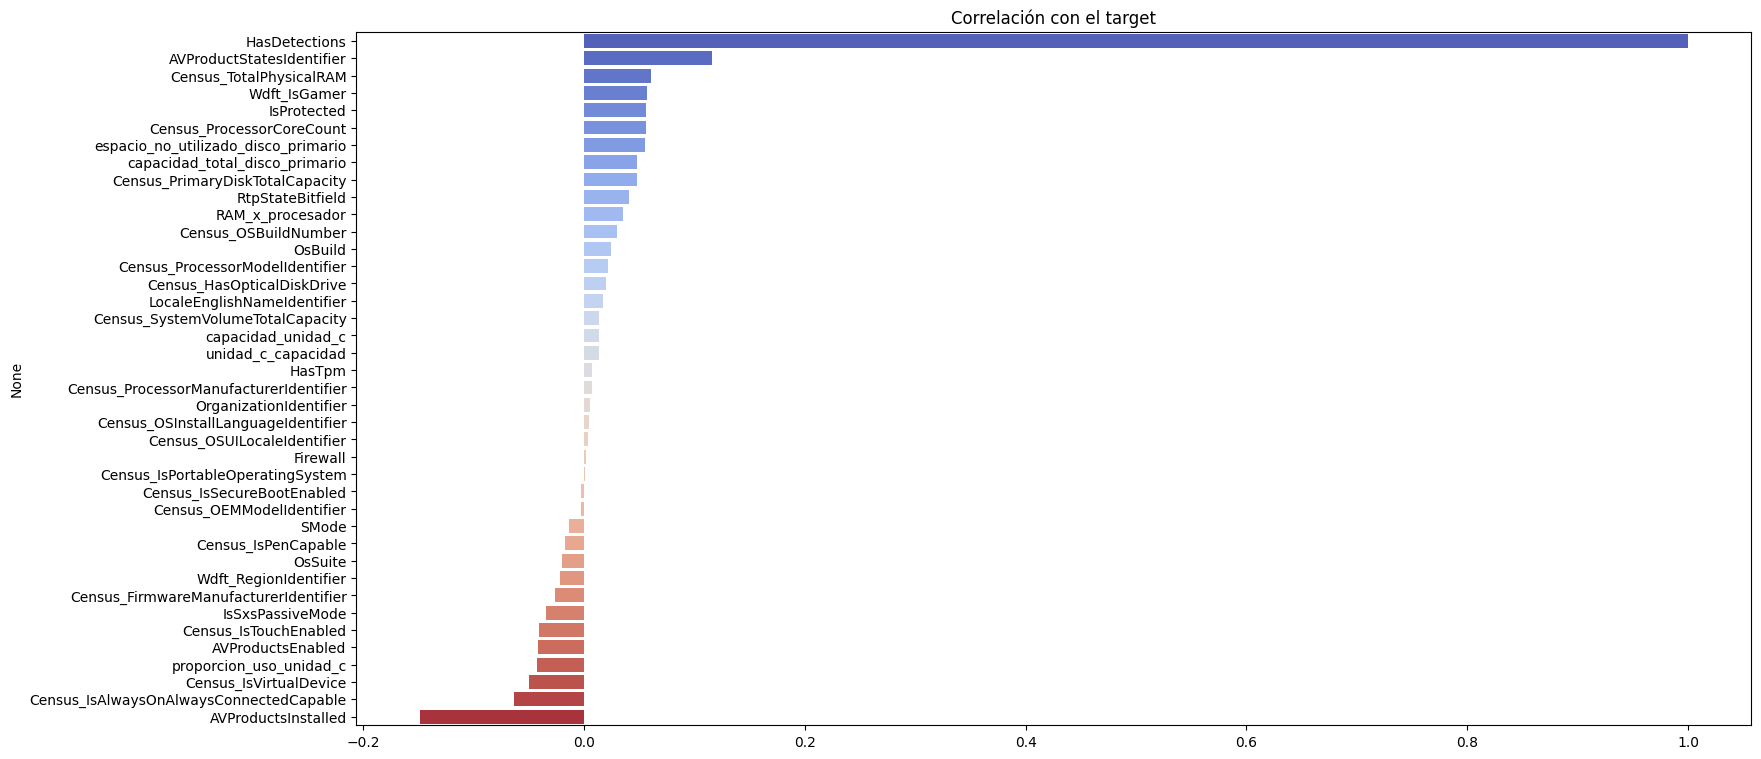

In [39]:
# Calcular la matriz de correlación con respecto a la variable objetivo
correlacion_numericas = df3.select_dtypes(include=['number']).corr()['HasDetections'].sort_values(ascending=False)

# Crear un gráfico de barras para visualizar la correlación
plt.figure(figsize=(18, 9))
sns.barplot(x=correlacion_numericas.values, y=correlacion_numericas.index, hue=correlacion_numericas.index, palette='coolwarm', legend=False)

plt.title('Correlación con el target')

plt.show()


In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499945 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 64 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ProductName                              499945 non-null  object 
 1   EngineVersion                            499945 non-null  object 
 2   AppVersion                               499945 non-null  object 
 3   AvSigVersion                             499945 non-null  object 
 4   RtpStateBitfield                         498113 non-null  float64
 5   IsSxsPassiveMode                         499945 non-null  int64  
 6   AVProductStatesIdentifier                498007 non-null  float64
 7   AVProductsInstalled                      498007 non-null  float64
 8   AVProductsEnabled                        498007 non-null  float64
 9   HasTpm                                   499945 non

In [41]:
df4 = df3.copy()

In [42]:
def setOthers(dataframe, column, num_values):
    top_categories = dataframe[column].value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append(f'Otros ({column})')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    return dataframe[column].fillna(f'Otros ({column})')

In [43]:
df4['Census_PrimaryDiskTypeName'].nunique()

4

In [44]:
df4['Census_PrimaryDiskTypeName'].value_counts(dropna = False)

Census_PrimaryDiskTypeName
HDD            325400
SSD            138131
UNKNOWN         20081
Unspecified     15624
NaN               709
Name: count, dtype: int64

In [45]:
df4['Census_PrimaryDiskTypeName'] = setOthers(df4, 'Census_PrimaryDiskTypeName', 2)

In [46]:
df4['Census_PrimaryDiskTypeName'].value_counts(dropna = False)

Census_PrimaryDiskTypeName
HDD                                   325400
SSD                                   138131
Otros (Census_PrimaryDiskTypeName)     36414
Name: count, dtype: int64

In [47]:
df4['SkuEdition'].value_counts(dropna = False)

SkuEdition
Home               308551
Pro                181004
Invalid              4423
Education            2320
Enterprise           1999
Enterprise LTSB      1141
Cloud                 309
Server                198
Name: count, dtype: int64

In [48]:
df4['SkuEdition'] = setOthers(df4, 'SkuEdition', 2)

In [49]:
df4['Census_ChassisTypeName'].value_counts(dropna = False)

Census_ChassisTypeName
Notebook               294216
Desktop                104956
Laptop                  38260
Portable                20181
AllinOne                11400
MiniTower                4848
Convertible              4685
Other                    4212
UNKNOWN                  3695
Detachable               2929
LowProfileDesktop        2877
HandHeld                 2651
SpaceSaving              1689
Tablet                    730
Tower                     692
Unknown                   575
MainServerChassis         512
MiniPC                    260
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
NaN                        37
30                         11
StickPC                     7
0                           5
MultisystemChassis          3
35                          3
PizzaBox                    3
Blade                       3
31                          2
SubChassis                  2
32               

In [50]:
df4['Census_ChassisTypeName'] = setOthers(df4, 'Census_ChassisTypeName', 5)


In [51]:
df4['Census_PowerPlatformRoleName'] = setOthers(df4, 'Census_PowerPlatformRoleName', 3)

In [52]:
df4["Census_PowerPlatformRoleName"].value_counts(dropna = False, normalize= True)*100


Census_PowerPlatformRoleName
Mobile                                  69.280221
Desktop                                 23.206153
Slate                                    5.494804
Otros (Census_PowerPlatformRoleName)     2.018822
Name: proportion, dtype: float64

In [53]:

df4['OsPlatformSubRelease'] = setOthers(df4, 'OsPlatformSubRelease', 7)

In [54]:
df4["OsPlatformSubRelease"].value_counts(dropna = False)


OsPlatformSubRelease
rs4                             220754
rs3                             139891
rs2                              43338
rs1                              40716
th2                              22955
th1                              15009
windows8.1                       10825
Otros (OsPlatformSubRelease)      6457
Name: count, dtype: int64

In [55]:
df4['Census_MDC2FormFactor'] = setOthers(df4, 'Census_MDC2FormFactor', 5)

In [56]:
df4["Census_MDC2FormFactor"].value_counts(dropna = False, normalize= True)*100


Census_MDC2FormFactor
Notebook                         64.193861
Desktop                          21.902409
Convertible                       4.474292
Detachable                        3.360170
AllInOne                          3.273160
Otros (Census_MDC2FormFactor)     2.796108
Name: proportion, dtype: float64

In [57]:
df4['Census_OSEdition'] = setOthers(df4, 'Census_OSEdition', 3)

In [58]:
df4["Census_OSEdition"].value_counts(dropna = False, normalize= True)*100

Census_OSEdition
Core                        38.896479
Professional                35.158867
CoreSingleLanguage          21.739991
Otros (Census_OSEdition)     4.204663
Name: proportion, dtype: float64

In [59]:
df4['Census_FlightRing'] = setOthers(df4, 'Census_FlightRing', 1)
#AGRUPO EN RETAIL 93,6% Y OTROS 6,3% 

In [60]:
df4["Census_FlightRing"].value_counts(dropna = False, normalize= True)*100

Census_FlightRing
Retail                       93.660903
Otros (Census_FlightRing)     6.339097
Name: proportion, dtype: float64

In [61]:
df4["Platform"].value_counts(dropna = False)

Platform
windows10      482993
windows8        10825
windows7         5314
windows2016       813
Name: count, dtype: int64

In [62]:
df4.drop(df4[(df4["Platform"] == "windows2016")].index, inplace=True)
#elimino windows2016, no llega al 1º de la totalidad

In [63]:
df4["Processor"].value_counts(dropna = False, normalize= True)*100

Processor
x64      90.869349
x86       9.127846
arm64     0.002805
Name: proportion, dtype: float64

In [64]:
df4.drop(df4[(df4["Processor"] == "arm64")].index, inplace=True)
#elimino arm64, no llega al 1º de la totalidad

In [65]:
df4["Census_DeviceFamily"].value_counts(dropna = False, normalize= True)*100

Census_DeviceFamily
Windows.Desktop    99.999199
Windows.Server      0.000601
Windows             0.000200
Name: proportion, dtype: float64

In [66]:
df4.drop(["Census_DeviceFamily"],axis = 1, inplace=True)
#elimino columna, desktop 99.99%

In [67]:
df4["Census_OSInstallTypeName"].value_counts(dropna = False, normalize= True)*100

Census_OSInstallTypeName
UUPUpgrade        29.406874
IBSClean          18.346964
Update            17.809015
Upgrade           14.026543
Other              9.401184
Reset              7.314503
Refresh            2.312079
Clean              0.778373
CleanPCRefresh     0.604466
Name: proportion, dtype: float64

In [68]:
df4["Census_OSInstallTypeName"] = df4["Census_OSInstallTypeName"].replace({"UUPUpgrade":"Upgrade"})
df4["Census_OSInstallTypeName"] = df4["Census_OSInstallTypeName"].replace({"IBSClean":"Clean"})
df4["Census_OSInstallTypeName"] = df4["Census_OSInstallTypeName"].replace({"CleanPCRefresh":"Clean"})
df4["Census_OSInstallTypeName"] = df4["Census_OSInstallTypeName"].replace({"Refresh":"Clean"})

In [69]:
df4["Census_OSWUAutoUpdateOptionsName"].value_counts(dropna = False, normalize= True)*100


Census_OSWUAutoUpdateOptionsName
FullAuto                                 44.569420
UNKNOWN                                  28.235608
Notify                                   22.740314
AutoInstallAndRebootAtMaintenanceTime     4.152926
Off                                       0.301732
Name: proportion, dtype: float64

In [70]:
df4.drop(df4[(df4["Census_OSWUAutoUpdateOptionsName"] == "Off")].index, inplace=True)
# elimino Off <1%

In [71]:
df4["Census_GenuineStateName"].value_counts(dropna = False, normalize= True)*100

Census_GenuineStateName
IS_GENUINE         88.292485
INVALID_LICENSE     8.974663
OFFLINE             2.577309
UNKNOWN             0.155543
Name: proportion, dtype: float64

In [72]:
df4.drop(df4[(df4["Census_GenuineStateName"] == "UNKNOWN")].index, inplace=True)

In [73]:
df4["Census_ActivationChannel"].value_counts(dropna = False, normalize= True)*100

Census_ActivationChannel
Retail         52.819430
OEM:DM         38.481960
Volume:GVLK     5.042489
OEM:NONSLP      3.561926
Volume:MAK      0.094196
Name: proportion, dtype: float64

In [74]:
df4["Census_ActivationChannel"] = df4["Census_ActivationChannel"].replace({"OEM:NONSLP":"OEM:DM"})
df4["Census_ActivationChannel"] = df4["Census_ActivationChannel"].replace({"OEM:DM":"OEM"})
df4["Census_ActivationChannel"] = df4["Census_ActivationChannel"].replace({"Volume:GVLK":"Volume:MAK"})
df4["Census_ActivationChannel"] = df4["Census_ActivationChannel"].replace({"Volume:MAK":"Volume"})
#agrupo nombres

In [75]:
def truncate_and_replace(dataframe, column, truncate_length):
    dataframe[column] = dataframe[column].str[:truncate_length]

In [76]:
truncate_and_replace(df4,'EngineVersion',7 )

In [77]:
truncate_and_replace(df4,'AppVersion',4 )


In [78]:
truncate_and_replace(df4,'AvSigVersion',5 )


In [79]:
df4["OsVer"].value_counts(dropna = False, normalize= True)*100

OsVer
10.0.0.0      96.751456
6.3.0.0        2.172539
6.1.1.0        1.061714
6.1.0.0        0.006642
10.0.3.0       0.002415
10.0.1.0       0.001409
6.3.3.0        0.000403
10.0.0.1       0.000403
6.3.1.0        0.000403
10.0.32.72     0.000403
10.0.32.0      0.000201
10.0.80.0      0.000201
10.0.5.0       0.000201
10.0.2.0       0.000201
6.3.5.0        0.000201
10.0.4.0       0.000201
10.0.8.0       0.000201
10.0.0.112     0.000201
6.3.32.72      0.000201
6.3.7.0        0.000201
10.0.7.0       0.000201
Name: proportion, dtype: float64

In [80]:
truncate_and_replace(df4,'OsVer',4 )


In [81]:
truncate_and_replace(df4,'Census_OSVersion',7 )


In [82]:
df4["OsVer"] = df4["OsVer"].replace({"6.3.":"6.3"})
df4["OsVer"] = df4["OsVer"].replace({"6.1.":"6.1"})


In [83]:
df4["SmartScreen"].value_counts(dropna = False, normalize= True)*100

SmartScreen
RequireAdmin    48.464489
NaN             35.681852
ExistsNotSet    11.719715
Off              1.972876
Warn             1.503709
Prompt           0.369537
Block            0.254610
off              0.014492
On               0.010667
&#x02;           0.004025
&#x01;           0.002415
on               0.001610
Name: proportion, dtype: float64

In [84]:
df4['SmartScreen'] = setOthers(df4, 'SmartScreen', 2)

In [85]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496838 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 63 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              496838 non-null  object  
 1   EngineVersion                            496838 non-null  object  
 2   AppVersion                               496838 non-null  object  
 3   AvSigVersion                             496838 non-null  object  
 4   RtpStateBitfield                         495010 non-null  float64 
 5   IsSxsPassiveMode                         496838 non-null  int64   
 6   AVProductStatesIdentifier                495716 non-null  float64 
 7   AVProductsInstalled                      495716 non-null  float64 
 8   AVProductsEnabled                        495716 non-null  float64 
 9   HasTpm                                  

In [86]:
# Punto de control, reviso numericas
df5 = df4.copy()

In [87]:
corr_df = df5.corr(numeric_only=True)
corr_df.style.background_gradient(cmap="coolwarm")

,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,OrganizationIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,SMode,Firewall,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_OSBuildNumber,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_FirmwareManufacturerIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,RAM_x_procesador,capacidad_total_disco_primario,unidad_c_capacidad,proporcion_uso_unidad_c,capacidad_unidad_c,espacio_no_utilizado_disco_primario
RtpStateBitfield,1.000000,-0.887114,0.105433,-0.182926,0.010273,-0.007716,0.004783,0.006726,-0.027479,-0.011859,0.060683,0.002215,0.006120,0.000024,-0.018788,0.003505,-0.005561,-0.027136,-0.019887,-0.010177,-0.023771,-0.034029,-0.013433,-0.013154,-0.000172,0.009597,-0.016931,0.008266,0.009486,0.006323,0.020021,-0.024484,-0.001556,0.040419,-0.018071,-0.027136,-0.019887,0.004923,-0.019887,-0.013793
IsSxsPassiveMode,-0.887114,1.000000,-0.111061,0.193911,0.027088,0.013838,-0.004628,-0.012080,0.045188,0.016418,-0.033248,-0.002770,-0.001293,0.000406,0.024128,0.000809,0.008789,0.022272,0.017029,0.010534,0.028894,0.043754,0.010644,0.010114,-0.001012,-0.010058,0.020838,-0.009225,-0.005592,-0.003090,-0.015870,0.031410,0.001319,-0.034162,0.019492,0.022272,0.017029,-0.000819,0.017029,0.010315
AVProductStatesIdentifier,0.105433,-0.111061,1.000000,-0.632381,-0.124174,0.141974,0.010932,-0.080138,0.002155,-0.059098,-0.145407,0.008212,0.000440,0.015791,0.057155,0.030356,0.021292,-0.073688,-0.087996,-0.051111,0.038087,-0.020974,0.019134,0.017654,0.002237,-0.012044,-0.033668,0.027046,0.040989,0.034576,0.063518,-0.022305,-0.019865,0.116424,-0.008728,-0.073688,-0.087996,-0.032305,-0.087996,0.010691
AVProductsInstalled,-0.182926,0.193911,-0.632381,1.000000,0.284080,0.023998,-0.013550,0.043015,0.006296,0.182016,-0.024472,-0.012594,-0.002313,-0.052828,-0.053994,-0.021787,-0.039169,0.110444,0.142949,0.029537,-0.037394,-0.004137,0.004805,0.004048,-0.007408,0.055986,0.215514,-0.042431,-0.013684,-0.027985,-0.070409,0.017964,0.033611,-0.149182,0.013107,0.110444,0.142949,0.066989,0.142949,-0.031690
AVProductsEnabled,0.010273,0.027088,-0.124174,0.284080,1.000000,-0.050527,-0.007694,-0.017132,-0.089975,0.031751,0.082602,-0.003797,-0.004130,-0.027113,-0.003691,-0.003006,-0.002522,0.025633,0.018288,0.002848,-0.003655,-0.070566,0.031710,0.031629,-0.001779,0.013361,0.037734,-0.010058,-0.003076,-0.007488,-0.019888,-0.012948,0.005242,-0.042231,-0.000028,0.025633,0.018288,-0.010179,0.018288,0.013736
HasTpm,-0.007716,0.013838,0.141974,0.023998,-0.050527,1.000000,0.000006,0.000189,0.366836,0.025481,-0.008818,0.002328,0.007364,-0.006908,0.029259,0.004282,-0.011074,0.010937,0.008412,0.005828,0.030160,0.207717,-0.013710,-0.013339,-0.053594,-0.000684,0.087567,0.002783,0.028775,0.016841,0.026485,0.064317,-0.013631,0.007604,0.016038,0.010937,0.008412,0.003680,0.008412,0.004995
OrganizationIdentifier,0.004783,-0.004628,0.010932,-0.013550,-0.007694,0.000006,1.000000,-0.001525,-0.014976,-0.002798,-0.009821,-0.000715,0.001205,0.005223,-0.002418,-0.009218,-0.011063,0.004375,0.005466,-0.006933,0.000184,-0.017036,-0.130811,-0.126299,0.003065,0.015560,0.008493,0.002341,0.009479,0.001298,0.000357,-0.001182,0.020151,0.005082,0.002336,0.004375,0.005466,0.000310,0.005466,-0.001056
LocaleEnglishNameIdentifier,0.006726,-0.012080,-0.080138,0.043015,-0.017132,0.000189,-0.001525,1.000000,-0.005342,0.065140,0.004159,-0.008206,0.011538,-0.042719,-0.117640,-0.067645,-0.093816,0.041781,0.123003,0.013590,-0.073001,-0.001716,0.123663,0.124431,-0.003399,0.012219,0.024879,-0.021334,-0.055364,-0

In [88]:
#creo lista para eliminar columnas con mucha correlacion 
to_kill_columns_corr = [
    "AVProductsInstalled",
    "IsSxsPassiveMode",
    "RtpStateBitfield",
    "Census_ProcessorModelIdentifier", 
    "Census_OSUILocaleIdentifier",
    "Census_OSBuildNumber",
    "Census_SystemVolumeTotalCapacity",
    "Census_OSInstallLanguageIdentifier",
    "proporcion_uso_unidad_c",
    "unidad_c_capacidad",
    "capacidad_total_disco_primario",
    "Census_ProcessorModelIdentifier",
    "Census_PrimaryDiskTotalCapacity",

    
]

In [89]:
df5.select_dtypes(include=['number']).isnull().sum()

RtpStateBitfield                             1828
IsSxsPassiveMode                                0
AVProductStatesIdentifier                    1122
AVProductsInstalled                          1122
AVProductsEnabled                            1122
HasTpm                                          0
OrganizationIdentifier                     153579
LocaleEnglishNameIdentifier                     0
OsBuild                                         0
OsSuite                                         0
IsProtected                                  1110
SMode                                       29676
Firewall                                     5103
Census_OEMModelIdentifier                    5702
Census_ProcessorCoreCount                    2342
Census_ProcessorManufacturerIdentifier       2342
Census_ProcessorModelIdentifier              2344
Census_PrimaryDiskTotalCapacity              2963
Census_SystemVolumeTotalCapacity             2963
Census_HasOpticalDiskDrive                      0


In [90]:
df5.drop((to_kill_columns_corr), axis = 1, inplace = True)

In [91]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496838 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 51 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              496838 non-null  object  
 1   EngineVersion                            496838 non-null  object  
 2   AppVersion                               496838 non-null  object  
 3   AvSigVersion                             496838 non-null  object  
 4   AVProductStatesIdentifier                495716 non-null  float64 
 5   AVProductsEnabled                        495716 non-null  float64 
 6   HasTpm                                   496838 non-null  int64   
 7   OrganizationIdentifier                   343259 non-null  float64 
 8   LocaleEnglishNameIdentifier              496838 non-null  int64   
 9   Platform                                

In [92]:
corr_df = df5.corr(numeric_only=True)
corr_df.style.background_gradient(cmap="coolwarm")

,AVProductStatesIdentifier,AVProductsEnabled,HasTpm,OrganizationIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,SMode,Firewall,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_IsPortableOperatingSystem,Census_FirmwareManufacturerIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,RAM_x_procesador,capacidad_unidad_c,espacio_no_utilizado_disco_primario
AVProductStatesIdentifier,1.000000,-0.124174,0.141974,0.010932,-0.080138,0.002155,-0.059098,-0.145407,0.008212,0.000440,0.015791,0.057155,0.030356,-0.051111,0.038087,0.002237,-0.012044,-0.033668,0.027046,0.040989,0.034576,0.063518,-0.022305,-0.019865,0.116424,-0.008728,-0.087996,0.010691
AVProductsEnabled,-0.124174,1.000000,-0.050527,-0.007694,-0.017132,-0.089975,0.031751,0.082602,-0.003797,-0.004130,-0.027113,-0.003691,-0.003006,0.002848,-0.003655,-0.001779,0.013361,0.037734,-0.010058,-0.003076,-0.007488,-0.019888,-0.012948,0.005242,-0.042231,-0.000028,0.018288,0.013736
HasTpm,0.141974,-0.050527,1.000000,0.000006,0.000189,0.366836,0.025481,-0.008818,0.002328,0.007364,-0.006908,0.029259,0.004282,0.005828,0.030160,-0.053594,-0.000684,0.087567,0.002783,0.028775,0.016841,0.026485,0.064317,-0.013631,0.007604,0.016038,0.008412,0.004995
OrganizationIdentifier,0.010932,-0.007694,0.000006,1.000000,-0.001525,-0.014976,-0.002798,-0.009821,-0.000715,0.001205,0.005223,-0.002418,-0.009218,-0.006933,0.000184,0.003065,0.015560,0.008493,0.002341,0.009479,0.001298,0.000357,-0.001182,0.020151,0.005082,0.002336,0.005466,-0.001056
LocaleEnglishNameIdentifier,-0.080138,-0.017132,0.000189,-0.001525,1.000000,-0.005342,0.065140,0.004159,-0.008206,0.011538,-0.042719,-0.117640,-0.067645,0.013590,-0.073001,-0.003399,0.012219,0.024879,-0.021334,-0.055364,-0.059801,-0.034181,-0.005104,0.160673,0.016831,0.013557,0.123003,-0.109668
OsBuild,0.002155,-0.089975,0.366836,-0.014976,-0.005342,1.000000,-0.031001,0.125401,0.013227,0.002998,0.031391,0.146653,0.012141,0.000344,0.174464,-0.008412,-0.061391,0.000652,-0.002165,-0.024345,0.031398,-0.061679,0.143245,-0.024839,0.024595,0.119743,0.079683,-0.012017
OsSuite,-0.059098,0.031751,0.025481,-0.002798,0.065140,-0.031001,1.000000,-0.027243,-0.003486,0.061776,-0.083823,-0.054168,-0.035526,-0.043085,-0.098037,-0.013319,0.077909,0.455284,-0.058452,0.094169,-0.053467,0.057864,-0.018187,0.035082,-0.021331,-0.055719,0.201775,-0.112285
IsProtected,-0.145407,0.082602,-0.008818,-0.009821,0.004159,0.125401,-0.027243,1.000000,0.001994,0.005696,0.018308,0.049727,0.002393,-0.009472,0.057686,0.003930,-0.041599,-0.036795,0.010963,-0.002295,0.012182,0.005755,0.035977,0.002175,0.056241,0.036249,-0.002349,-0.021881
SMode,0.008212,-0.003797,0.002328,-0.000715,-0.008206,0.013227,-0.003486,0.001994,1.000000,0.001673,0.007180,-0.010680,0.005118,-0.006061,-0.007266,-0.000486,0.007486,0.017385,-0.000188,0.014511,0.024641,0.017678,-0.002917,0.003539,-0.013631,0.000969,-0.018406,-0.010498
Firewall,0.000440,-0.004130,0.007364,0.001205,0.011538,0.002998,0.061776,0.005696,0.001673,1.000000,-0.001596,-0.025854,-0.014898,0.001268,-0.026165,0.000902,0.022075,0.029730,-0.027603,0.016056,0.009960,0.020778,0.003366,0.029229,0.000934,-0.009412,0.012379,-0.036984


In [93]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496838 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 51 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              496838 non-null  object  
 1   EngineVersion                            496838 non-null  object  
 2   AppVersion                               496838 non-null  object  
 3   AvSigVersion                             496838 non-null  object  
 4   AVProductStatesIdentifier                495716 non-null  float64 
 5   AVProductsEnabled                        495716 non-null  float64 
 6   HasTpm                                   496838 non-null  int64   
 7   OrganizationIdentifier                   343259 non-null  float64 
 8   LocaleEnglishNameIdentifier              496838 non-null  int64   
 9   Platform                                

In [94]:
df5.describe(include = "number").T

,count,mean,std,min,25%,50%,75%,max
AVProductStatesIdentifier,495716.0,47848.363587,14024.524573,3.0,49480.0,53447.0,53447.0,70492.0
AVProductsEnabled,495716.0,1.020590,0.166127,0.0,1.0,1.0,1.0,4.0
HasTpm,496838.0,0.987855,0.109532,0.0,1.0,1.0,1.0,1.0
OrganizationIdentifier,343259.0,24.870512,5.607150,1.0,18.0,27.0,27.0,52.0
LocaleEnglishNameIdentifier,496838.0,122.684485,69.320322,1.0,74.0,88.0,182.0,283.0
OsBuild,496838.0,15725.921743,2192.551854,7600.0,15063.0,16299.0,17134.0,18242.0
OsSuite,496838.0,576.485953,247.745546,256.0,256.0,768.0,768.0,784.0
IsProtected,495728.0,0.945753,0.226506,0.0,1.0,1.0,1.0,1.0
SMode,467162.0,0.000439,0.020943,0.0,0.0,0.0,0.0,1.0
Firewall,491735.0,0.978826,0.143964,0.0,1.0,1.0,1.0,1.0


In [95]:
def mostrar_categorias_mayores_a_2(df, columna):
  """
  Muestra las categorías de una columna de un DataFrame que tienen una frecuencia mayor al 2%, junto con su porcentaje.

  Args:
    df: DataFrame de Pandas.
    columna: Nombre de la columna a analizar.
  """

  # Calcular la frecuencia de cada categoría
  frecuencias = df[columna].value_counts(normalize=True) * 100

  # Seleccionar categorías con frecuencia superior al 2%
  categorias_mayores_a_2 = frecuencias[frecuencias > 2].index

  # Mostrar las categorías y su porcentaje
  print(f"Categorías con frecuencia mayor al 2% en la columna '{columna}':")
  for categoria in categorias_mayores_a_2:
    print(f"- {categoria}: {frecuencias[categoria]:.2f}%")

In [96]:
def setnumber(dataframe, column, num_values):
    numeric_column = pd.to_numeric(dataframe[column], errors='coerce')
    top_categories = numeric_column.value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append(-1)
    dataframe[column] = pd.Categorical(numeric_column, categories=top_categories_list, ordered=False)
    dataframe[column] = dataframe[column].astype(float).fillna(-1)
    return dataframe[column]

In [97]:
df5["OsBuild"].value_counts(dropna = False, normalize= True)*100
#agrupo 7 valores, resto -1

OsBuild
17134    44.221054
16299    27.943917
15063     8.714108
14393     8.017905
10586     4.614985
10240     3.018288
9600      2.173948
7601      1.061714
17692     0.031197
17738     0.026568
17744     0.025763
17758     0.017108
17746     0.012479
17713     0.012076
17754     0.011271
17751     0.010265
17741     0.010064
17755     0.009057
17735     0.007246
17686     0.007045
17763     0.006642
17733     0.006642
7600      0.006642
17760     0.006239
17682     0.004025
17677     0.003422
18234     0.003220
17672     0.002818
18242     0.002415
18237     0.002214
17661     0.001610
17666     0.001610
17723     0.000805
17634     0.000805
17639     0.000604
17730     0.000604
17618     0.000604
17747     0.000604
17655     0.000403
17650     0.000403
17753     0.000201
17604     0.000201
18214     0.000201
17711     0.000201
17704     0.000201
18219     0.000201
17623     0.000201
17749     0.000201
Name: proportion, dtype: float64

In [98]:
mostrar_categorias_mayores_a_2(df5, 'OsBuild')

Categorías con frecuencia mayor al 2% en la columna 'OsBuild':
- 17134: 44.22%
- 16299: 27.94%
- 15063: 8.71%
- 14393: 8.02%
- 10586: 4.61%
- 10240: 3.02%
- 9600: 2.17%


In [99]:
df5['OsBuild'] = setnumber(df5, 'OsBuild', 7)
df5["OsBuild"] = df5["OsBuild"].replace(-1, 5000)
# el -1 es el 1.2%,lo convierto en 17134.0


In [100]:
df5["Census_ProcessorCoreCount"].value_counts(dropna = False, normalize= True)*100

Census_ProcessorCoreCount
4.0     60.921266
2.0     25.837194
8.0      9.790716
12.0     1.035146
6.0      0.797242
1.0      0.744307
NaN      0.471381
16.0     0.186379
3.0      0.145520
20.0     0.017511
32.0     0.017108
24.0     0.015699
40.0     0.005032
28.0     0.003422
36.0     0.003220
5.0      0.002013
48.0     0.002013
10.0     0.001811
56.0     0.001006
7.0      0.000403
64.0     0.000403
11.0     0.000201
44.0     0.000201
52.0     0.000201
80.0     0.000201
14.0     0.000201
46.0     0.000201
Name: proportion, dtype: float64

In [101]:
df5['Census_ProcessorCoreCount'] = setnumber(df5, 'Census_ProcessorCoreCount', 3)

In [102]:
def agruparcientosmiles(dataframe, column, num_bins):
    bins = [0, 100001, 200001, 500001, 1000001, float('inf')]
    labels = [100000, 200000, 500000, 1000000, 1000001]
    binned_values = pd.cut(dataframe[column], bins=bins, labels=labels, include_lowest=True)
    dataframe[column] = binned_values
    return dataframe[column]

In [103]:
def category_float (df, columns):
    df["columns"] = df["columns"].astype("float")
    df["columns"] = df["columns"].fillna(0)

In [104]:
df5["Census_TotalPhysicalRAM"].value_counts(dropna = False, normalize= True)*100

Census_TotalPhysicalRAM
4096.0     45.836269
8192.0     24.674642
2048.0     12.337824
16384.0     6.020071
6144.0      4.475503
             ...    
7808.0      0.000201
8090.0      0.000201
98302.0     0.000201
8067.0      0.000201
4120.0      0.000201
Name: proportion, Length: 480, dtype: float64

In [105]:
mostrar_categorias_mayores_a_2(df5, "Census_TotalPhysicalRAM")

Categorías con frecuencia mayor al 2% en la columna 'Census_TotalPhysicalRAM':
- 4096.0: 46.25%
- 8192.0: 24.90%
- 2048.0: 12.45%
- 16384.0: 6.07%
- 6144.0: 4.52%


In [106]:
df5["Census_TotalPhysicalRAM"].value_counts(dropna = False)

Census_TotalPhysicalRAM
4096.0     227732
8192.0     122593
2048.0      61299
16384.0     29910
6144.0      22236
            ...  
7808.0          1
8090.0          1
98302.0         1
8067.0          1
4120.0          1
Name: count, Length: 480, dtype: int64

In [108]:
df5["Census_TotalPhysicalRAM"] = df5["Census_TotalPhysicalRAM"].astype("float")
df5["Census_TotalPhysicalRAM"] = df5["Census_TotalPhysicalRAM"].fillna(0)
#Nulos los convierto en 0

In [109]:
def agrupa_miles(dataframe, column, num_bins):
    bins = [0, 2001, 5001, 10001, float('inf')]
    labels = [2000, 5000, 10000, 20000]
    binned_values = pd.cut(dataframe[column], bins=bins, labels=labels, include_lowest=True)
    dataframe[column] = binned_values
    return dataframe[column]

In [110]:
agrupa_miles(df5, "Census_TotalPhysicalRAM", 4)

MachineIdentifier
f1cd864e97bae82bdf96523e1a539121    10000
fd5ba6f5b75325ec0423a6c67cc75942    10000
4e628391e7cc7c482fb3286f486dbd25    10000
270a2e9d028144a4df12a9e3da79fba5    10000
06ca8fa8d32c2abdc5b3577d676b3269     5000
                                    ...  
a739cacc292f3f1e745827c1ca6c6ada     5000
a4c232d528d98343e8f1b73650da7b82    10000
fd16cd542d660848d272e4552bcccb1e     5000
fa0841f8f6147de7c3d287e05270ed42    10000
7b45dc3537e17f16305c5983ca0a1cb9    20000
Name: Census_TotalPhysicalRAM, Length: 496838, dtype: category
Categories (4, int64): [2000 < 5000 < 10000 < 20000]

In [111]:
mostrar_categorias_mayores_a_2(df5, "Census_FirmwareManufacturerIdentifier")

Categorías con frecuencia mayor al 2% en la columna 'Census_FirmwareManufacturerIdentifier':
- 142.0: 30.91%
- 628.0: 14.07%
- 554.0: 13.47%
- 355.0: 10.77%
- 556.0: 9.21%
- 500.0: 4.43%
- 93.0: 2.19%


In [112]:
df5["Census_FirmwareManufacturerIdentifier"].value_counts(dropna = False, normalize= True)*100

Census_FirmwareManufacturerIdentifier
142.0    30.294784
628.0    13.789605
554.0    13.200279
355.0    10.553138
556.0     9.022861
           ...    
697.0     0.000201
13.0      0.000201
334.0     0.000201
236.0     0.000201
585.0     0.000201
Name: proportion, Length: 299, dtype: float64

In [113]:
df5["Census_FirmwareManufacturerIdentifier"] = setnumber(df5, 'Census_FirmwareManufacturerIdentifier', 7)


In [114]:
def eliminar_categorias_infrecuentes(df, columna, min_frecuencia=0.01):
    frecuencias = df[columna].value_counts(dropna=False, normalize=True) * 100
    categorias_infrecuentes = frecuencias[frecuencias < 1].index
    df.drop(df[df[columna].isin(categorias_infrecuentes)].index, inplace=True)

    #df4.drop(df4[(df4["Census_OSWUAutoUpdateOptionsName"] == "Off")].index, inplace=True)


In [115]:
mostrar_categorias_mayores_a_2(df5, "AVProductStatesIdentifier")


Categorías con frecuencia mayor al 2% en la columna 'AVProductStatesIdentifier':
- 53447.0: 65.53%
- 7945.0: 5.35%
- 47238.0: 3.72%
- 62773.0: 3.00%


In [116]:
df5["AVProductStatesIdentifier"] = setnumber(df5, 'AVProductStatesIdentifier', 4)


In [117]:
df5["AVProductStatesIdentifier"].value_counts(dropna = False, normalize= True)*100
#ohe

AVProductStatesIdentifier
 53447.0    65.385498
-1.0        22.577581
 7945.0      5.336951
 47238.0     3.707647
 62773.0     2.992323
Name: proportion, dtype: float64

In [118]:
mostrar_categorias_mayores_a_2(df5, "LocaleEnglishNameIdentifier")
#oe

Categorías con frecuencia mayor al 2% en la columna 'LocaleEnglishNameIdentifier':
- 75: 23.53%
- 182: 5.03%
- 74: 4.59%
- 42: 4.55%
- 88: 4.21%
- 233: 3.84%
- 171: 3.79%
- 227: 3.70%
- 251: 2.38%
- 124: 2.17%


In [119]:
df5["LocaleEnglishNameIdentifier"].value_counts(dropna = False, normalize= True)*100
#elimino valores <1%


LocaleEnglishNameIdentifier
75     23.526783
182     5.032425
74      4.590027
42      4.546351
88      4.208011
         ...    
152     0.000201
155     0.000201
165     0.000201
190     0.000201
127     0.000201
Name: proportion, Length: 233, dtype: float64

In [120]:
df5["LocaleEnglishNameIdentifier"] = setnumber(df5, 'LocaleEnglishNameIdentifier', 10)


In [121]:
df5["OsSuite"].value_counts(dropna = False)
#elimino valores menores al 1% me quedo con 31 valores

OsSuite
768    310985
256    185843
784        10
Name: count, dtype: int64

In [122]:
eliminar_categorias_infrecuentes(df5, "OsSuite", min_frecuencia=0.01)


In [123]:
df5["Census_OEMModelIdentifier"].value_counts(dropna = False, normalize= True)*100

Census_OEMModelIdentifier
313586.0    3.406813
242491.0    2.961588
317701.0    1.530308
317708.0    1.302060
NaN         1.147681
              ...   
324421.0    0.000201
30086.0     0.000201
341325.0    0.000201
257535.0    0.000201
35038.0     0.000201
Name: proportion, Length: 40460, dtype: float64

In [124]:
mostrar_categorias_mayores_a_2(df5, "Census_OEMModelIdentifier")


Categorías con frecuencia mayor al 2% en la columna 'Census_OEMModelIdentifier':
- 313586.0: 3.45%
- 242491.0: 3.00%


In [125]:
df5["Census_OEMModelIdentifier"] = df5["Census_OEMModelIdentifier"].astype("string")


In [126]:
truncate_and_replace(df5,'Census_OEMModelIdentifier',2 )

In [127]:
df5["Census_OEMModelIdentifier"] = setnumber(df5, 'Census_OEMModelIdentifier', 15)


In [128]:
def convert_to_string(df, column_name):
    """
    Converts a column in a DataFrame to the string data type.

    Args:
        df (pd.DataFrame): The DataFrame containing the column to convert.
        column_name (str): The name of the column to convert.

    Returns:
        pd.DataFrame: The modified DataFrame with the converted column.

    Raises:
        ValueError: If the column name is not found in the DataFrame.
    """

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    df[column_name] = df[column_name].astype("string")

In [129]:
df5["Census_ProcessorManufacturerIdentifier"].value_counts(dropna = False)

Census_ProcessorManufacturerIdentifier
5.0    436191
1.0     58288
NaN      2342
3.0         7
Name: count, dtype: int64

In [130]:
eliminar_categorias_infrecuentes(df5, "Census_ProcessorManufacturerIdentifier", min_frecuencia=0.01)

In [131]:
df5["Wdft_RegionIdentifier"].value_counts(dropna = False, normalize= True)*100

Wdft_RegionIdentifier
10.0    20.128054
11.0    15.188512
3.0     14.617608
1.0     13.763780
15.0    11.477939
7.0      6.601089
NaN      3.342104
8.0      3.143713
13.0     2.520228
5.0      2.297165
12.0     1.822524
6.0      1.737586
4.0      1.520590
9.0      0.902768
2.0      0.891848
14.0     0.044491
Name: proportion, dtype: float64

In [132]:
df5["Wdft_RegionIdentifier"] = setnumber(df5, 'Wdft_RegionIdentifier', 9)


In [133]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494479 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 51 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              494479 non-null  object  
 1   EngineVersion                            494479 non-null  object  
 2   AppVersion                               494479 non-null  object  
 3   AvSigVersion                             494479 non-null  object  
 4   AVProductStatesIdentifier                494479 non-null  float64 
 5   AVProductsEnabled                        493362 non-null  float64 
 6   HasTpm                                   494479 non-null  int64   
 7   OrganizationIdentifier                   341584 non-null  float64 
 8   LocaleEnglishNameIdentifier              494479 non-null  float64 
 9   Platform                                

In [134]:
df5.head().T

MachineIdentifier,f1cd864e97bae82bdf96523e1a539121,fd5ba6f5b75325ec0423a6c67cc75942,4e628391e7cc7c482fb3286f486dbd25,270a2e9d028144a4df12a9e3da79fba5,06ca8fa8d32c2abdc5b3577d676b3269
ProductName,win8defender,win8defender,win8defender,win8defender,win8defender
EngineVersion,1.1.151,1.1.151,1.1.151,1.1.152,1.1.152
AppVersion,4.18,4.18,4.9.,4.18,4.18
AvSigVersion,1.273,1.273,1.273,1.275,1.275
AVProductStatesIdentifier,53447.0,53447.0,-1.0,53447.0,47238.0
AVProductsEnabled,1.0,1.0,1.0,1.0,1.0
HasTpm,1,1,1,1,1
OrganizationIdentifier,NaN,NaN,27.0,27.0,27.0
LocaleEnglishNameIdentifier,-1.0,124.0,-1.0,-1.0,75.0
Platform,windows10,windows10,windows10,windows10,windows10


In [135]:
df5.select_dtypes(exclude=['number']).isnull().sum()

ProductName                         0
EngineVersion                       0
AppVersion                          0
AvSigVersion                        0
Platform                            0
Processor                           0
OsVer                               0
OsPlatformSubRelease                0
SkuEdition                          0
SmartScreen                         0
Census_MDC2FormFactor               0
Census_PrimaryDiskTypeName          0
Census_TotalPhysicalRAM             0
Census_ChassisTypeName              0
Census_PowerPlatformRoleName        0
Census_OSVersion                    0
Census_OSArchitecture               0
Census_OSBranch                     0
Census_OSEdition                    0
Census_OSInstallTypeName            0
Census_OSWUAutoUpdateOptionsName    0
Census_GenuineStateName             0
Census_ActivationChannel            0
Census_FlightRing                   0
dtype: int64

In [136]:
corr_df = df5.corr(numeric_only=True)
corr_df.style.background_gradient(cmap="coolwarm")

,AVProductStatesIdentifier,AVProductsEnabled,HasTpm,OrganizationIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,SMode,Firewall,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_HasOpticalDiskDrive,Census_IsPortableOperatingSystem,Census_FirmwareManufacturerIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,RAM_x_procesador,capacidad_unidad_c,espacio_no_utilizado_disco_primario
AVProductStatesIdentifier,1.000000,-0.206845,0.163070,0.015228,-0.010273,0.086243,-0.135302,0.044547,0.012313,0.015150,0.032190,0.021226,0.022674,-0.035830,0.005309,-0.087478,-0.143072,0.039664,0.031107,0.035343,0.080098,0.000536,-0.056498,0.136691,-0.009828,-0.119511,0.017347
AVProductsEnabled,-0.206845,1.000000,-0.051118,-0.007580,-0.007650,-0.087889,0.031584,0.082339,-0.003809,-0.004320,-0.020988,0.004720,-0.003029,0.002811,-0.001780,0.024613,0.037540,-0.010067,-0.003168,-0.007474,-0.019890,-0.013057,0.010932,-0.042207,-0.000483,0.018201,0.013747
HasTpm,0.163070,-0.051118,1.000000,-0.000128,-0.012370,0.443292,0.025484,-0.008899,0.002324,0.007573,0.006128,0.024009,0.004264,0.005570,-0.053277,0.025005,0.087212,0.002683,0.028537,0.016713,0.026490,0.064105,0.003241,0.007503,0.014541,0.008213,0.005182
OrganizationIdentifier,0.015228,-0.007580,-0.000128,1.000000,0.018369,-0.014257,-0.002658,-0.009727,-0.000719,0.001050,0.008779,0.001180,-0.009211,-0.006997,0.003032,0.015198,0.008655,0.002719,0.009579,0.001429,0.000425,-0.001191,-0.016866,0.005266,0.002253,0.005435,-0.001010
LocaleEnglishNameIdentifier,-0.010273,-0.007650,-0.012370,0.018369,1.000000,-0.041058,-0.018391,0.002116,-0.001620,-0.005729,-0.002311,-0.048804,-0.042708,-0.004645,0.000560,-0.016936,-0.035723,-0.002341,-0.023357,-0.032588,-0.010866,-0.003123,0.185719,0.012706,-0.005073,0.044680,-0.030835
OsBuild,0.086243,-0.087889,0.443292,-0.014257,-0.041058,1.000000,-0.020302,0.113175,0.011683,0.003081,0.029151,0.096133,0.012757,-0.000421,-0.007699,-0.021847,0.015971,-0.005339,-0.020454,0.029386,-0.054155,0.135306,-0.023175,0.024824,0.108732,0.077948,-0.010620
OsSuite,-0.135302,0.031584,0.025484,-0.002658,-0.018391,-0.020302,1.000000,-0.027392,-0.003528,0.061718,-0.049827,0.010116,-0.035530,-0.043591,-0.013490,0.162304,0.455512,-0.058387,0.094122,-0.053706,0.057882,-0.018887,0.037734,-0.021188,-0.059481,0.201759,-0.112341
IsProtected,0.044547,0.082339,-0.008899,-0.009727,0.002116,0.113175,-0.027392,1.000000,0.002003,0.005606,0.009443,0.031498,0.002364,-0.009448,0.003930,-0.046451,-0.036873,0.011036,-0.002211,0.012331,0.005763,0.036188,-0.015197,0.056519,0.037067,-0.002369,-0.021788
SMode,0.012313,-0.003809,0.002324,-0.000719,-0.001620,0.011683,-0.003528,0.002003,1.000000,0.001673,0.007329,-0.009106,0.005117,-0.006088,-0.000487,0.000575,0.017402,-0.000186,0.014515,0.024677,0.017685,-0.002953,-0.000853,-0.013652,0.000799,-0.018413,-0.010499
Firewall,0.015150,-0.004320,0.007573,0.001050,-0.005729,0.003081,0.061718,0.005606,0.001673,1.000000,-0.002040,-0.016261,-0.014890,0.001271,0.000888,0.016582,0.029758,-0.027502,0.016012,0.009850,0.020768,0.003267,0.017407,0.001046,-0.009978,0.012354,-0.036930


In [137]:
#creo lista para eliminar columnas con mucha correlacion 
to_kill_columns_corr = [
    "AVProductsInstalled"
    "RtpStateBitfield",
    "Census_ProcessorModelIdentifier", 
    "Census_OSUILocaleIdentifier",
    "Census_OSBuildNumber",
    "Census_SystemVolumeTotalCapacity",
    "Census_OSInstallLanguageIdentifier"
]

In [138]:
#Compruebo las columnas que únicamente tienen 1 valor 
num_valores_unicos = df5.nunique()
columnas_con_un_atributo = num_valores_unicos[num_valores_unicos == 1].index
columnas_con_un_atributo



Index([], dtype='object')

In [139]:
df6 = df5.copy()

In [140]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494479 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 51 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              494479 non-null  object  
 1   EngineVersion                            494479 non-null  object  
 2   AppVersion                               494479 non-null  object  
 3   AvSigVersion                             494479 non-null  object  
 4   AVProductStatesIdentifier                494479 non-null  float64 
 5   AVProductsEnabled                        493362 non-null  float64 
 6   HasTpm                                   494479 non-null  int64   
 7   OrganizationIdentifier                   341584 non-null  float64 
 8   LocaleEnglishNameIdentifier              494479 non-null  float64 
 9   Platform                                

In [141]:
df6.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsEnabled,HasTpm,OrganizationIdentifier,LocaleEnglishNameIdentifier,Platform,...,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,RAM_x_procesador,capacidad_unidad_c,espacio_no_utilizado_disco_primario
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.151,4.18,1.273,53447.0,1.0,1,NaN,-1.0,windows10,...,0.0,0,0,0.0,0.0,11.0,1,2048.0,952838.0,1031.0
fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.151,4.18,1.273,53447.0,1.0,1,NaN,124.0,windows10,...,0.0,0,0,0.0,1.0,3.0,0,2048.0,457600.0,19340.0
4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.151,4.9.,1.273,-1.0,1.0,1,27.0,-1.0,windows10,...,0.0,1,1,0.0,0.0,15.0,0,2048.0,221251.0,22947.0
270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.152,4.18,1.275,53447.0,1.0,1,27.0,-1.0,windows10,...,0.0,0,0,0.0,0.0,15.0,1,1024.0,228321.0,615.0
06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.152,4.18,1.275,47238.0,1.0,1,27.0,75.0,windows10,...,0.0,1,0,0.0,1.0,13.0,1,1024.0,464374.0,12566.0


In [142]:
def get_var_list(df):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in df:
        if    (df[i].dtype.kind=="f" or df[i].dtype.kind=="i") and len(df[i].unique())!= 2  and i not in TARGET:
              lista_numericas.append(i)
        elif  (df[i].dtype.kind=="f" or df[i].dtype.kind=="i")  and len(df[i].unique())== 2  and i not in TARGET:
              lista_boolean.append(i)
        elif  (df[i].dtype.kind=="O")  and i not in TARGET:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [143]:
lista_numericas, lista_boolean, lista_categoricas= get_var_list(df6)


In [144]:
df6[lista_numericas].describe().T

,count,mean,std,min,25%,50%,75%,max
AVProductStatesIdentifier,494479.0,38962.698100,23486.534177,-1.0,7945.0,53447.0,53447.0,62773.0
AVProductsEnabled,493362.0,1.020632,0.166183,0.0,1.0,1.0,1.0,4.0
OrganizationIdentifier,341584.0,24.870899,5.604047,1.0,18.0,27.0,27.0,52.0
LocaleEnglishNameIdentifier,494479.0,67.846382,77.272627,-1.0,-1.0,74.0,88.0,251.0
OsBuild,494479.0,15669.106399,2362.326302,5000.0,15063.0,16299.0,17134.0,17134.0
IsProtected,493374.0,0.945700,0.226608,0.0,1.0,1.0,1.0,1.0
SMode,465020.0,0.000441,0.020992,0.0,0.0,0.0,0.0,1.0
Firewall,489437.0,0.978863,0.143840,0.0,1.0,1.0,1.0,1.0
Census_OEMModelIdentifier,494479.0,22.474574,9.057998,-1.0,18.0,24.0,30.0,33.0
Census_ProcessorCoreCount,494479.0,3.724680,1.812364,-1.0,2.0,4.0,4.0,8.0


In [145]:
df6["LocaleEnglishNameIdentifier"].value_counts()

LocaleEnglishNameIdentifier
-1.0      208886
 75.0     116301
 182.0     24829
 74.0      22722
 42.0      22412
 88.0      20839
 233.0     18996
 171.0     18732
 227.0     18263
 251.0     11769
 124.0     10730
Name: count, dtype: int64

In [146]:
lista_numericas

['AVProductStatesIdentifier',
 'AVProductsEnabled',
 'OrganizationIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'IsProtected',
 'SMode',
 'Firewall',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_FirmwareManufacturerIdentifier',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'Wdft_RegionIdentifier',
 'RAM_x_procesador',
 'capacidad_unidad_c',
 'espacio_no_utilizado_disco_primario']

In [147]:
lista_boolean


['HasTpm',
 'OsSuite',
 'Census_ProcessorManufacturerIdentifier',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable']

In [148]:
lista_categoricas

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [149]:
df7 = df6.copy()

In [150]:
columnas_a_codificar= ['AppVersion',
 'AvSigVersion',
 'Census_OSVersion',
 'EngineVersion',
 ]

In [151]:
df7[columnas_a_codificar] = df7[columnas_a_codificar].astype(str)

In [152]:
def encode_categories_inplace(dataframe, columns, threshold=0.05, other_label='otros'):
    for column in columns:
        # Obtener la cuenta de cada categoría
        category_counts = dataframe[column].value_counts(normalize=True)

        # Filtrar las categorías que representan más del % indicado del total
        significant_categories = category_counts[category_counts >= threshold].index

        # Aplicar Label Encoding a las categorías restantes y asignar "otros" a las que no cumplen la condición
        label_encoder = LabelEncoder()
        dataframe[column] = label_encoder.fit_transform(dataframe[column])
        
        inverse_mapping = {i: cat for i, cat in enumerate(label_encoder.classes_)}

        # Si hay más de una categoría significativa, aplicar One-Hot Encoding
        if len(significant_categories) > 1:
            onehot_encoder = OneHotEncoder()
            onehot_encoded = onehot_encoder.fit_transform(dataframe[[column]])

            encoded_dataframe = pd.DataFrame(
                onehot_encoded.toarray(),  # Asegura la representación densa
                columns=[f"{column}_{inverse_mapping[i]}" for i in range(onehot_encoded.shape[1])],
                index=dataframe.index  # Mantiene los índices originales
            )

            # Eliminar la columna original
            dataframe.drop(columns=[column], inplace=True)

            # Concatenar el nuevo DataFrame codificado con el DataFrame original
            dataframe = pd.concat([dataframe, encoded_dataframe], axis=1)

        else:
            # Si no hay más de una categoría significativa, agrupar en 'columna_otros' los valores que no cumplen la condición
            dataframe['engineversion_otros'] = dataframe.apply(lambda row: row[column] if row[column] in significant_categories else other_label, axis=1)
            dataframe.drop(columns=[column], inplace=True)

    return dataframe


In [153]:
df7 = encode_categories_inplace(df7, columnas_a_codificar, threshold=0.05, other_label='otros')


In [154]:
#me quedo con 148 columnas tras la conversión
df7.shape[1]

138

In [155]:
pd.set_option('display.width', None)

df7.head(10)


,ProductName,AVProductStatesIdentifier,AVProductsEnabled,HasTpm,OrganizationIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,...,EngineVersion_1.1.144,EngineVersion_1.1.145,EngineVersion_1.1.146,EngineVersion_1.1.147,EngineVersion_1.1.148,EngineVersion_1.1.149,EngineVersion_1.1.150,EngineVersion_1.1.151,EngineVersion_1.1.152,EngineVersion_1.1.153
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
f1cd864e97bae82bdf96523e1a539121,win8defender,53447.0,1.0,1,NaN,-1.0,windows10,x64,10.0,17134.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
fd5ba6f5b75325ec0423a6c67cc75942,win8defender,53447.0,1.0,1,NaN,124.0,windows10,x64,10.0,17134.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4e628391e7cc7c482fb3286f486dbd25,win8defender,-1.0,1.0,1,27.0,-1.0,windows10,x64,10.0,10586.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
270a2e9d028144a4df12a9e3da79fba5,win8defender,53447.0,1.0,1,27.0,-1.0,windows10,x64,10.0,17134.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
06ca8fa8d32c2abdc5b3577d676b3269,win8defender,47238.0,1.0,1,27.0,75.0,windows10,x64,10.0,17134.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6c3ff3036d3ecc96729a615653742608,win8defender,7945.0,1.0,1,NaN,75.0,windows10,x64,10.0,16299.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8ab73b7f8dbb0d0d57f54a8b4799e960,win8defender,53447.0,1.0,1,27.0,-1.0,windows10,x86,10.0,15063.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1c4ec21828b563afb6b0aa72ef88926d,win8defender,-1.0,1.0,1,18.0,42.0,windows10,x64,10.0,15063.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0b247aa88737776d0f88ce4dee447216,win8defender,-1.0,1.0,1,27.0,-1.0,windows10,x64,10.0,17134.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [156]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [157]:
"""df_impute = ColumnTransformer(
    transformers = [
       ("impute_constant_m1", SimpleImputer(strategy = "constant", fill_value = -1), [lista_boolean]),
       
 ],
    remainder = "passthrough"
)"""

'df_impute = ColumnTransformer(\n    transformers = [\n       ("impute_constant_m1", SimpleImputer(strategy = "constant", fill_value = -1), [lista_boolean]),\n       \n ],\n    remainder = "passthrough"\n)'

In [158]:
# Imprimir columnas con 2 valores únicos
print("Columnas con 2 valores únicos:")
for columna in df7.columns:
    num_valores_unicos = df7[columna].nunique()
    if num_valores_unicos == 2:
        tipo_columna = df7[columna].dtype
        print(f"{columna}: {num_valores_unicos} valores únicos, Tipo: {tipo_columna}")

# Imprimir columnas con 2 a 10 valores únicos
print("\nColumnas con 2 a 10 valores únicos:")
for columna in df7.columns:
    num_valores_unicos = df7[columna].nunique()
    if 2 < num_valores_unicos <= 10:
        tipo_columna = df7[columna].dtype
        print(f"{columna}: {num_valores_unicos} valores únicos, Tipo: {tipo_columna}")

# Imprimir columnas con más de 10 valores únicos
print("\nColumnas con más de 10 valores únicos:")
for columna in df7.columns:
    num_valores_unicos = df7[columna].nunique()
    if num_valores_unicos > 10:
        tipo_columna = df7[columna].dtype
        print(f"{columna}: {num_valores_unicos} valores únicos, Tipo: {tipo_columna}")


Columnas con 2 valores únicos:
HasTpm: 2 valores únicos, Tipo: int64
Processor: 2 valores únicos, Tipo: object
OsSuite: 2 valores únicos, Tipo: int64
IsProtected: 2 valores únicos, Tipo: float64
SMode: 2 valores únicos, Tipo: float64
Firewall: 2 valores únicos, Tipo: float64
Census_ProcessorManufacturerIdentifier: 2 valores únicos, Tipo: float64
Census_HasOpticalDiskDrive: 2 valores únicos, Tipo: int64
Census_OSArchitecture: 2 valores únicos, Tipo: object
Census_IsPortableOperatingSystem: 2 valores únicos, Tipo: int64
Census_FlightRing: 2 valores únicos, Tipo: category
Census_IsSecureBootEnabled: 2 valores únicos, Tipo: int64
Census_IsVirtualDevice: 2 valores únicos, Tipo: float64
Census_IsTouchEnabled: 2 valores únicos, Tipo: int64
Census_IsPenCapable: 2 valores únicos, Tipo: int64
Census_IsAlwaysOnAlwaysConnectedCapable: 2 valores únicos, Tipo: float64
Wdft_IsGamer: 2 valores únicos, Tipo: float64
HasDetections: 2 valores únicos, Tipo: int64
AppVersion_4.10: 2 valores únicos, Tipo: f

AvSigVersion_1.243: 2 valores únicos, Tipo: float64
AvSigVersion_1.245: 2 valores únicos, Tipo: float64
AvSigVersion_1.247: 2 valores únicos, Tipo: float64
AvSigVersion_1.249: 2 valores únicos, Tipo: float64
AvSigVersion_1.251: 2 valores únicos, Tipo: float64
AvSigVersion_1.253: 2 valores únicos, Tipo: float64
AvSigVersion_1.255: 2 valores únicos, Tipo: float64
AvSigVersion_1.257: 2 valores únicos, Tipo: float64
AvSigVersion_1.259: 2 valores únicos, Tipo: float64
AvSigVersion_1.261: 2 valores únicos, Tipo: float64
AvSigVersion_1.263: 2 valores únicos, Tipo: float64
AvSigVersion_1.265: 2 valores únicos, Tipo: float64
AvSigVersion_1.267: 2 valores únicos, Tipo: float64
AvSigVersion_1.269: 2 valores únicos, Tipo: float64
AvSigVersion_1.271: 2 valores únicos, Tipo: float64
AvSigVersion_1.273: 2 valores únicos, Tipo: float64
AvSigVersion_1.275: 2 valores únicos, Tipo: float64
AvSigVersion_1.277: 2 valores únicos, Tipo: float64
Census_OSVersion_10.0.10: 2 valores únicos, Tipo: float64
Census

In [159]:
#Lista de columnas para OneHotEncoder
columns_to_ohe = [
 'ProductName',
 'Platform',
 'Processor',
 'OsPlatformSubRelease',
 'SkuEdition',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing'] 


In [160]:

df7_subset = df7[columns_to_ohe]

# Aplica One-Hot Encoding a las columnas seleccionadas
df7_encoded = pd.get_dummies(df7_subset, columns=columns_to_ohe)

# Inicializa el LabelEncoder
label_encoder = LabelEncoder()

# Itera sobre las columnas codificadas y conviértelas a tipo entero
for columna_codificada in df7_encoded.columns:
    df7_encoded[columna_codificada] = label_encoder.fit_transform(df7_encoded[columna_codificada])

# Concatena el DataFrame codificado con el DataFrame original
df7 = pd.concat([df7, df7_encoded], axis=1)

# Elimina las columnas originales que han sido codificadas
df7 = df7.drop(columns=columns_to_ohe)

# Ahora, df contiene las columnas codificadas y convertidas a tipo entero


In [161]:
columnas_no_numericas = df7.select_dtypes(exclude='number').columns
columnas_no_numericas

Index(['OsVer', 'SmartScreen'], dtype='object')

In [162]:
columnas_no_numericas = columnas_no_numericas#.tolist()

#columnas_no_numericas.remove('SmartScreen')
for columna in columnas_no_numericas:
    # Imprime el nombre de la columna
    print(f"\nValue counts para la columna '{columna}':")
    
    # Imprime el resultado de value_counts para la columna actual
    print(df[columna].value_counts())



Value counts para la columna 'OsVer':
OsVer
10.0.0.0      483830
6.3.0.0        10818
6.1.1.0         5281
6.1.0.0           33
10.0.3.0          12
10.0.1.0           7
6.3.3.0            2
10.0.0.1           2
6.3.1.0            2
10.0.32.72         2
10.0.32.0          1
10.0.80.0          1
10.0.5.0           1
10.0.2.0           1
6.3.5.0            1
10.0.4.0           1
10.0.8.0           1
10.0.0.112         1
6.3.32.72          1
6.3.7.0            1
10.0.7.0           1
Name: count, dtype: int64

Value counts para la columna 'SmartScreen':
SmartScreen
RequireAdmin    420190
ExistsNotSet     58497
Off              10388
Warn              7530
Prompt            1950
Block             1274
off                 75
On                  53
&#x02;              20
&#x01;              14
on                   8
requireadmin         1
Name: count, dtype: int64


In [163]:
df8=df7.copy()

In [164]:
columnas_frecuencia = ['OsVer', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_OSBranch', 'Census_OSEdition']

In [165]:
columnas_frecuencia_encoding = {}
for columna in columnas_frecuencia:
    columnas_frecuencia_encoding[columna] = df[columna].value_counts().to_dict()

In [166]:
df8.shape[1]

200

In [167]:
columnas_no_numericas = df8.select_dtypes(exclude='number').columns
columnas_no_numericas

Index(['OsVer', 'SmartScreen'], dtype='object')

In [168]:
#df8 = df8.set_index('MachineIdentifier', drop=True)


In [169]:
df8.head()

,AVProductStatesIdentifier,AVProductsEnabled,HasTpm,OrganizationIdentifier,LocaleEnglishNameIdentifier,OsVer,OsBuild,OsSuite,IsProtected,SMode,SmartScreen,Firewall,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_HasOpticalDiskDrive,Census_IsPortableOperatingSystem,Census_FirmwareManufacturerIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,RAM_x_procesador,capacidad_unidad_c,espacio_no_utilizado_disco_primario,AppVersion_4.10,AppVersion_4.11,AppVersion_4.12,AppVersion_4.13,AppVersion_4.14,AppVersion_4.15,AppVersion_4.16,AppVersion_4.17,AppVersion_4.18,AppVersion_4.4.,AppVersion_4.5.,AppVersion_4.6.,AppVersion_4.7.,AppVersion_4.8.,AppVersion_4.9.,AvSigVersion_0.0.0,AvSigVersion_1.169,AvSigVersion_1.199,AvSigVersion_1.207,AvSigVersion_1.213,AvSigVersion_1.217,AvSigVersion_1.219,AvSigVersion_1.221,AvSigVersion_1.223,AvSigVersion_1.225,AvSigVersion_1.227,AvSigVersion_1.229,AvSigVersion_1.231,AvSigVersion_1.233,AvSigVersion_1.235,AvSigVersion_1.237,AvSigVersion_1.239,AvSigVersion_1.241,AvSigVersion_1.243,AvSigVersion_1.245,AvSigVersion_1.247,AvSigVersion_1.249,AvSigVersion_1.251,AvSigVersion_1.253,AvSigVersion_1.255,AvSigVersion_1.257,AvSigVersion_1.259,AvSigVersion_1.261,AvSigVersion_1.263,AvSigVersion_1.265,AvSigVersion_1.267,AvSigVersion_1.269,AvSigVersion_1.271,AvSigVersion_1.273,AvSigVersion_1.275,AvSigVersion_1.277,Census_OSVersion_10.0.10,Census_OSVersion_10.0.11,Census_OSVersion_10.0.14,Census_OSVersion_10.0.15,Census_OSVersion_10.0.16,Census_OSVersion_10.0.17,Census_OSVersion_10.0.18,Census_OSVersion_6.3.960,EngineVersion_1.1.104,EngineVersion_1.1.117,EngineVersion_1.1.121,EngineVersion_1.1.124,EngineVersion_1.1.126,EngineVersion_1.1.127,EngineVersion_1.1.128,EngineVersion_1.1.129,EngineVersion_1.1.130,EngineVersion_1.1.131,EngineVersion_1.1.132,EngineVersion_1.1.133,EngineVersion_1.1.134,EngineVersion_1.1.135,EngineVersion_1.1.136,EngineVersion_1.1.137,EngineVersion_1.1.138,EngineVersion_1.1.139,EngineVersion_1.1.140,EngineVersion_1.1.141,EngineVersion_1.1.142,EngineVersion_1.1.143,EngineVersion_1.1.144,EngineVersion_1.1.145,EngineVersion_1.1.146,EngineVersion_1.1.147,EngineVersion_1.1.148,EngineVersion_1.1.149,EngineVersion_1.1.150,EngineVersion_1.1.151,EngineVersion_1.1.152,EngineVersion_1.1.153,ProductName_mse,ProductName_mseprerelease,ProductName_win8defender,Platform_windows10,Platform_windows7,Platform_windows8,Processor_x64,Processor_x86,OsPlatformSubRelease_rs4,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs1,OsPlatformSubRelease_th2,OsPlatformSubRelease_th1,OsPlatformSubRelease_windows8.1,OsPlatformSubRelease_Otros (OsPlatformSubRelease),SkuEdition_Home,SkuEdition_Pro,SkuEdition_Otros (SkuEdition),Census_MDC2FormFactor_Notebook,Census_MDC2FormFactor_Desktop,Census_MDC2FormFactor_Convertible,Census_MDC2FormFactor_Detachable,Census_MDC2FormFactor_AllInOne,Census_MDC2FormFactor_Otros (Census_MDC2FormFactor),Census_PrimaryDiskTypeName_HDD,Census_PrimaryDiskTypeName_SSD,Census_PrimaryDiskTypeName_Otros (Census_PrimaryDiskTypeName),Census_TotalPhysicalRAM_2000,Census_TotalPhysicalRAM_5000,Census_TotalPhysicalRAM_10000,Census_TotalPhysicalRAM_20000,Census_ChassisTypeName_Notebook,Census_ChassisTypeName_Desktop,Census_ChassisTypeName_Laptop,Census_ChassisTypeName_Portable,Census_ChassisTypeName_AllinOne,Census_ChassisTypeName_Otros (Census_ChassisTypeName),Census_PowerPlatformRoleName_Mobile,Census_PowerPlatformRoleName_Desktop,Census_PowerPlatformRoleName_Slate,Census_PowerPlatformRoleName_Otros (Census_PowerPlatformRoleName),Census_OSArchitecture_amd64,Census_OSArchitecture_x86,Census_OSBranch_rs1_release,Census_OSBranch_rs2_release,Census_OSBranch_rs3_release,Census_OSBranch_rs3_release_svc_escrow,Census_OSBranch_rs3_release_svc_escrow_im,Census_OSBranch_rs4_release,Census_OSBranch_rs5_release,Census_OSB

In [170]:
df8.info()


<class 'pandas.core.frame.DataFrame'>
Index: 494479 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 200 entries, AVProductStatesIdentifier to Census_FlightRing_Otros (Census_FlightRing)
dtypes: category(1), float64(110), int64(88), object(1)
memory usage: 771.1+ MB


In [171]:
# Selección de las columnas de interés
X = df8.drop(TARGET, axis=1)
y = df8[TARGET]

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[['OsVer', 'SmartScreen']])

# Concatenate the encoded columns with other features
X_train = np.concatenate([X_train.drop(['OsVer', 'SmartScreen'], axis=1), X_train_encoded], axis=1)

# Create the DMatrix with the encoded data
dtrain = xgb.DMatrix(X_train, y_train, enable_categorical=True)

In [172]:
# Creamos el lightGBM
lgb_clf = lgb.LGBMClassifier(num_leaves=1024, max_depth=10, learning_rate=0.1, n_estimators=100, min_child_samples=20, subsample=0.8,
                             colsample_bytree=0.8, reg_alpha=0.01, reg_lambda=0.01)

# Create label encoders for categorical columns
le_osver = LabelEncoder()
le_smartscreen = LabelEncoder()

# Fit the encoders on the training data
le_osver.fit(X_train['OsVer'])
le_smartscreen.fit(X_train['SmartScreen'])

# Encode the categorical columns in both train and test data
X_train['OsVer_encoded'] = le_osver.transform(X_train['OsVer'])
X_train['SmartScreen_encoded'] = le_smartscreen.transform(X_train['SmartScreen'])

X_test['OsVer_encoded'] = le_osver.transform(X_test['OsVer'])
X_test['SmartScreen_encoded'] = le_smartscreen.transform(X_test['SmartScreen'])

# Drop the original categorical columns
X_train = X_train.drop(['OsVer', 'SmartScreen'], axis=1)
X_test = X_test.drop(['OsVer', 'SmartScreen'], axis=1)

# Eliminación de espacios en blanco para el algoritmo lightGBM
X_train.columns = [col.replace(' ', '_') for col in X_train.columns]
X_test.columns = [col.replace(' ', '_') for col in X_test.columns]

# Create the DMatrix with the encoded data
lgb_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 198080, number of negative: 197503
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1068
[LightGBM] [Info] Number of data points in the train set: 395583, number of used features: 179
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500729 -> initscore=0.002917
[LightGBM] [Info] Start training from score 0.002917
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier(colsample_bytree=0.8, max_depth=10, num_leaves=1024,
               reg_alpha=0.01, reg_lambda=0.01, subsample=0.8)

In [173]:
print(X_train.columns)

Index(['AVProductStatesIdentifier', 'AVProductsEnabled', 'HasTpm',
       'OrganizationIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild',
       'OsSuite', 'IsProtected', 'SMode', 'Firewall',
       ...
       'Census_GenuineStateName_INVALID_LICENSE',
       'Census_GenuineStateName_IS_GENUINE', 'Census_GenuineStateName_OFFLINE',
       'Census_ActivationChannel_OEM', 'Census_ActivationChannel_Retail',
       'Census_ActivationChannel_Volume', 'Census_FlightRing_Retail',
       'Census_FlightRing_Otros_(Census_FlightRing)', 'OsVer_encoded',
       'SmartScreen_encoded'],
      dtype='object', length=199)


In [174]:
X_train_filtered = X_train.drop('AVProductsEnabled', axis=1)

In [175]:
# Define el modelo lightGBM
modelo = lgb.LGBMClassifier(num_leaves=256, max_depth=8, learning_rate=0.1, n_estimators=100, min_child_samples=10, min_split_gain=0.0, subsample=0.8,
                             colsample_bytree=0.8, reg_alpha=0.01, reg_lambda=0.01)

# Entrena el modelo con el conjunto de train
modelo.fit(X_train, y_train)

# Evalúa el modelo con el conjunto de test
acc = modelo.score(X_test, y_test)

# Imprime la puntuación del modelo
print('Accuracy:', acc)

[LightGBM] [Info] Number of positive: 198080, number of negative: 197503
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 395583, number of used features: 182
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500729 -> initscore=0.002917
[LightGBM] [Info] Start training from score 0.002917
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [176]:
# Definición de hiperparámetros para la búsqueda
parametros = {'max_depth': [8, 9, 12], 'min_child_samples': [20, 50, 100]}

# Configuración de GridSearchCV con LGBMClassifier. El num_leaves debe ser una potencia de 2 de max_depth, es decir, si max_depth = 10, num_leaves= 1024 (2^10 = 1024)
grid_search = GridSearchCV(estimator=lgb.LGBMClassifier(learning_rate=0.1,max_depth=10, num_leaves=1024, 
                                                        objective='binary', metric='auc', boosting_type='gbdt', random_state=42, force_row_wise=True),
                           param_grid=parametros,
                           scoring='accuracy',
                           cv=5)

# Ejecución de la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtención del mejor modelo
mejor_modelo = grid_search.best_estimator_

[LightGBM] [Info] Number of positive: 158464, number of negative: 158002
[LightGBM] [Info] Total Bins 1064
[LightGBM] [Info] Number of data points in the train set: 316466, number of used features: 177
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500730 -> initscore=0.002920
[LightGBM] [Info] Start training from score 0.002920
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [177]:
mejor_modelo

LGBMClassifier(force_row_wise=True, max_depth=9, metric='auc', num_leaves=1024,
               objective='binary', random_state=42)

In [183]:
# EJECUTAR EN CASO DE ERROR NaN

#imputador = SimpleImputer(strategy='constant', fill_value=-1)

# Crear una instancia del modelo RandomForestClassifier
#modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Construir el pipeline con el imputador seguido del clasificador RandomForest
#pipeline = Pipeline(steps=[
    #('imputador', imputador),
    #('clasificador', modelo_rf)
#])

# Entrenar el pipeline con el conjunto de entrenamiento
# El pipeline primero reemplazará los valores NaN por la constante definida y luego entrenará el modelo
#pipeline.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba utilizando el pipeline
# Las predicciones también se beneficiarán del paso de imputación para manejar los valores NaN
#predicciones = pipeline.predict(X_test)

# Evaluar el rendimiento del modelo
#precision = accuracy_score(y_test, predicciones)
#print(f"Precisión del modelo Random Forest con imputación de constantes:", precision)

In [178]:
# Crea una instancia del modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrena el modelo con el conjunto de entrenamiento
modelo_rf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
predicciones = modelo_rf.predict(X_test)

# Evalúa el rendimiento del modelo
precision = accuracy_score(y_test, predicciones)
print(f"Precisión del modelo Random Forest:", precision)

Precisión del modelo Random Forest: 0.6404910208704093


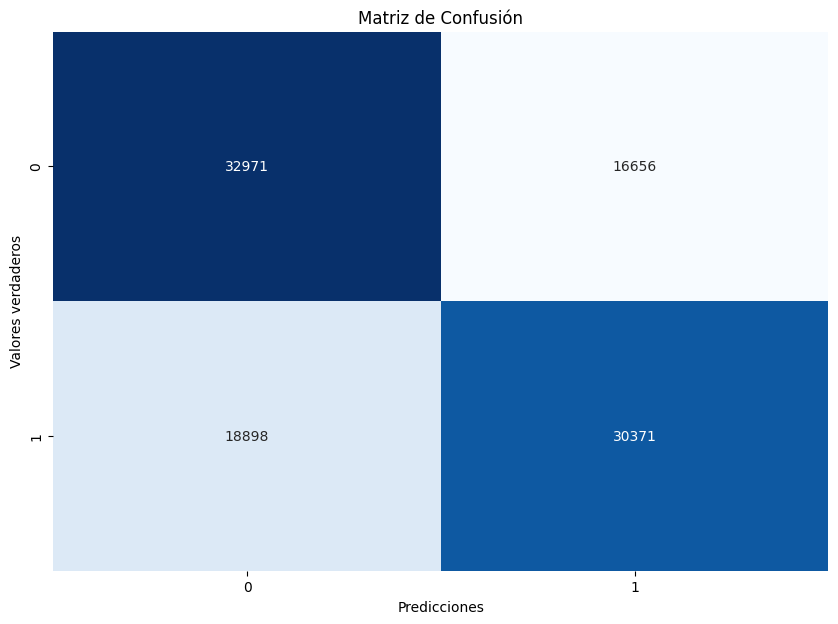

In [179]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, predicciones)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
plt.show()

In [180]:
df7.describe(exclude = "number").T

,count,unique,top,freq
OsVer,494479,3,10.0,478506
SmartScreen,494479,3,RequireAdmin,240462


In [181]:
y_pred_proba = mejor_modelo.predict_proba(X_test)[:, 1]

In [182]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)  # Calcula el AUC utilizando las tasas de falsos y verdaderos positivos

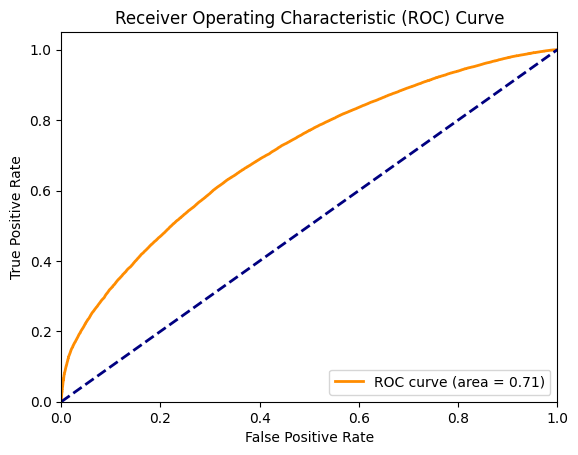

In [184]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Dibuja la línea diagonal para referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()